**Maestría:**

Ciencia de Datos y Máquinas de Aprendizaje con Mención en Inteligencia Artificial

**Asignatura:**

Proyecto de Integración Curricular

**Integrantes:**

*   Freddy Lituma Perero
*   Ivan Ortega Salas
*   Juan Suárez León
*   Eleanor Varela Tapia

# Librerías

In [ ]:
import numpy as np
import pandas as pd

from scipy.stats import randint

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb

import shap
from sklearn.manifold import TSNE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, InputLayer, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LearningRateScheduler

# Carga de datos

In [ ]:
# 'URL_DEL_ARCHIVO_CSV' del archivo CSV del train balanceado
url = '/content/train_balanceado.csv'

try:
    df_train_balanceado = pd.read_csv(url)
    print("Archivo cargado corecto de train balanceado")
except Exception as e:
    print(f"Error al cargar el archivo CSV de train balanceado: {e}")

Archivo cargado corecto de train balanceado


In [ ]:
# Muestra las primeras filas del DataFrame
df_train_balanceado.head().T

0           1                      2  \
category                        home    misc_net          entertainment   
amt                             15.0      109.96                  10.43   
city                        Moriarty     Burbank                 Eugene   
state                     New Mexico  Washington                 Oregon   
lat                          34.9889     46.1966                44.0385   
long                       -106.0609   -118.9017              -123.0614   
city_pop                        7268        3684                 191096   
merch_lat                  35.191886   45.563869              44.708545   
merch_long               -105.832554 -118.076592            -122.072096   
age                               31          39                     55   
transaction_hour                  12           2                      3   
transaction_day_of_month          14          30                     15   
transaction_month                  1          12                      1   
transaction_year                2019        2020                   2019   
transaction_day_of_week            0           2                      1   
profession_group               Salud        Arte  Ingeniería y Técnicos   
fraud_category_merchant            2           2                      2   
is_fraud                           0           0                      0   

                                     3            4  
category                  shopping_pos  grocery_net  
amt                               5.71         39.7  
city                           Redford       Arnold  
state                         Missouri     Missouri  
lat                            37.3272      38.4305  
long                          -91.0243      -90.387  
city_pop                           241        35439  
merch_lat                     36.85701    38.952935  
merch_long                  -91.002408   -90.990324  
age                                 46           35  
transaction_hour                    19            5  
transaction_day_of_month            27           27  
transaction_month                   12           12  
transaction_year                  2020         2020  
transaction_day_of_week              6            6  
profession_group                 Other        Other  
fraud_category_merchant              0            4  
is_fraud                             0            0

In [ ]:
# Cuenta los valores únicos de la columna 'category' en el DataFrame df_train_balanceado
unique_category = df_train_balanceado['category'].nunique()
print(f"La cantidad de categorías únicas en el dataset es: {unique_category}")

La cantidad de categorías únicas en el dataset es: 14


In [ ]:
# Cuenta los valores únicos de la columna 'state' en el DataFrame df_train_balanceado
unique_states = df_train_balanceado['state'].nunique()
print(f"La cantidad de ciudades únicas en el dataset es: {unique_states}")

La cantidad de ciudades únicas en el dataset es: 13


In [ ]:
# Cuenta los valores únicos de la columna 'city' en el DataFrame df_train_balanceado
unique_cities = df_train_balanceado['city'].nunique()
print(f"La cantidad de ciudades únicas en el dataset es: {unique_cities}")

La cantidad de ciudades únicas en el dataset es: 176


In [ ]:
# Cuenta los valores únicos de la columna 'profession_group' en el DataFrame df_train_balanceado
unique_profession_group = df_train_balanceado['profession_group'].nunique()
print(f"La cantidad de grupo de profesiones únicas en el dataset es: {unique_profession_group}")

La cantidad de grupo de profesiones únicas en el dataset es: 7


In [ ]:
# 'URL_DEL_ARCHIVO_CSV' del archivo CSV del test
url = '/content/test.csv'

try:
    df_test = pd.read_csv(url)
    print("Archivo cargado corecto de test")
except Exception as e:
    print(f"Error al cargar el archivo CSV de test: {e}")

Archivo cargado corecto de test


In [ ]:
# Muestra las primeras filas del DataFrame
df_test.head().T

0            1                   2  \
category                       home  grocery_net        shopping_net   
amt                           30.02        48.31               80.94   
city                         Arnold       Dumont  Blairsden-Graeagle   
state                      Missouri     Colorado          California   
lat                         38.4305      39.7532             39.8127   
long                        -90.387    -105.6356           -120.6405   
city_pop                      35439          565                1725   
merch_lat                 39.256111    40.504011           39.595713   
merch_long               -91.262386  -106.561224          -120.16454   
age                              35           41                  53   
transaction_hour                 19            5                   4   
transaction_day_of_month         29            1                  29   
transaction_month                12            1                  12   
transaction_year               2020         2019                2020   
transaction_day_of_week           1            1                   1   
profession_group              Other        Salud          Ejecutivos   
fraud_category_merchant           3            0                   5   
is_fraud                          0            0                   0   

                                      3           4  
category                         travel    misc_pos  
amt                                5.28        68.7  
city                      Cascade Locks    Sun City  
state                            Oregon  California  
lat                              45.671     33.7467  
long                          -121.8686   -117.1721  
city_pop                           1288       54287  
merch_lat                     46.504832   33.932468  
merch_long                   -121.68543 -116.294259  
age                                  83          47  
transaction_hour                     20          11  
transaction_day_of_month             20           1  
transaction_month                     1           1  
transaction_year                   2019        2019  
transaction_day_of_week               6           1  
profession_group                  Other        Arte  
fraud_category_merchant               0           5  
is_fraud                              0           0

In [ ]:
# Columnas de df_train_balanceado
df_train_balanceado.columns

Index(['category', 'amt', 'city', 'state', 'lat', 'long', 'city_pop',
       'merch_lat', 'merch_long', 'age', 'transaction_hour',
       'transaction_day_of_month', 'transaction_month', 'transaction_year',
       'transaction_day_of_week', 'profession_group',
       'fraud_category_merchant', 'is_fraud'],
      dtype='object')

In [ ]:
# Columnas de df_test
df_test.columns

Index(['category', 'amt', 'city', 'state', 'lat', 'long', 'city_pop',
       'merch_lat', 'merch_long', 'age', 'transaction_hour',
       'transaction_day_of_month', 'transaction_month', 'transaction_year',
       'transaction_day_of_week', 'profession_group',
       'fraud_category_merchant', 'is_fraud'],
      dtype='object')

# Limpieza de Outliers en el train

In [ ]:
# Muestra información del DataFrame df_train_balanceado
df_train_balanceado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20160 entries, 0 to 20159
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   category                  20160 non-null  object 
 1   amt                       20160 non-null  float64
 2   city                      20160 non-null  object 
 3   state                     20160 non-null  object 
 4   lat                       20160 non-null  float64
 5   long                      20160 non-null  float64
 6   city_pop                  20160 non-null  int64  
 7   merch_lat                 20160 non-null  float64
 8   merch_long                20160 non-null  float64
 9   age                       20160 non-null  int64  
 10  transaction_hour          20160 non-null  int64  
 11  transaction_day_of_month  20160 non-null  int64  
 12  transaction_month         20160 non-null  int64  
 13  transaction_year          20160 non-null  int64  
 14  transa

Separando los datos en X_train, y_train, X_test, y_test

In [ ]:
# X_train todas las columnas de df_train_balanceado menos 'is_fraud'
X_train = df_train_balanceado.drop('is_fraud', axis=1)

In [ ]:
# y_train solo columna 'is_fraud' de df_train_balanceado
y_train =  df_train_balanceado['is_fraud']

In [ ]:
# X_test todas las columnas de df_test menos 'is_fraud'
X_test = df_test.drop('is_fraud', axis=1)

In [ ]:
# y_test solo columna 'is_fraud' de df_test
y_test =  df_test['is_fraud']

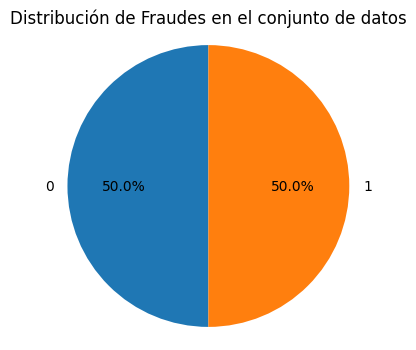

In [ ]:
# Verificando los datos balanceados
if 'is_fraud' in df_train_balanceado.columns:
    # Cuenta la cantidad de cada valor en la columna 'is_fraud'
    conteo_fraude = df_train_balanceado['is_fraud'].value_counts()

    # Crea el gráfico de pastel
    plt.figure(figsize=(4, 4))
    plt.pie(conteo_fraude, labels=conteo_fraude.index, autopct='%1.1f%%', startangle=90)
    plt.title('Distribución de Fraudes en el conjunto de datos')
    plt.axis('equal')  # Asegura que el gráfico sea un círculo
    plt.show()
else:
    print("La columna 'is_fraud' no se encuentra en el DataFrame.")

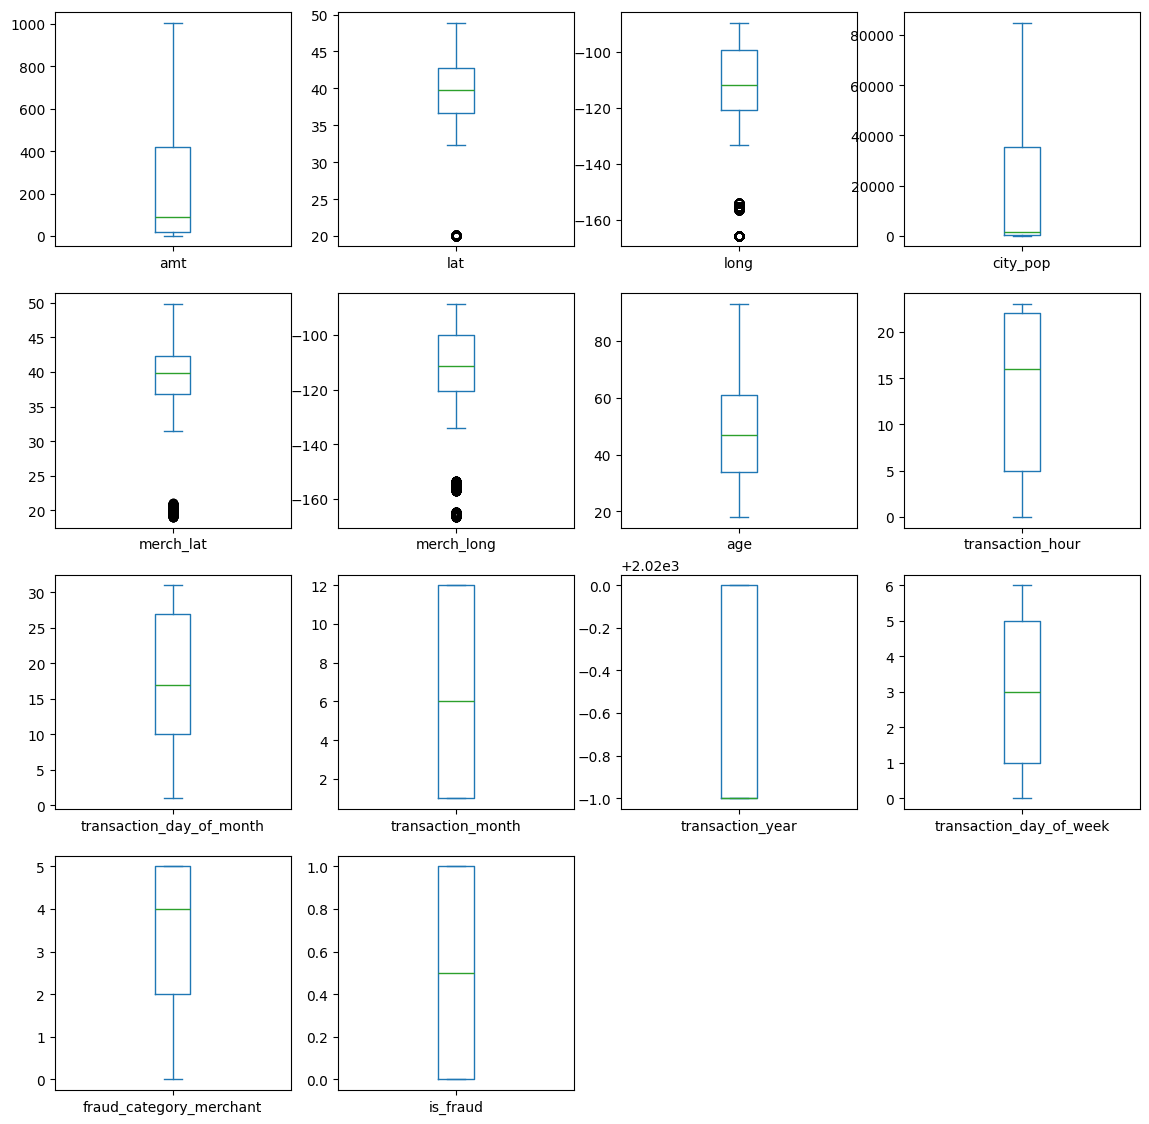

In [ ]:
# Diagrana boxplot para visualizar los Outliers
df_train_balanceado.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(14, 14))
plt.show()

In [ ]:
# ----- Función para rastreo del mejor percentil superior para ajuste de outliers superiores
def HallaMejorPercentilSup(micol,  maximo, minimo, miCotaSup, dataframeA):
	for x in range(maximo, minimo, -1):
		valor_tope_actual = np.quantile(dataframeA.iloc[:,micol] , x/100)
		print(f"Percentil {x} = {np.round(valor_tope_actual,micol)},col = {micol}, CotaSup = {miCotaSup}")
		if(valor_tope_actual <= miCotaSup):
			return x , valor_tope_actual

# Proceso de corrección de Outlier Superior en train
columnas =  [1, 4, 6, 7]
for col in columnas:
  q3=np.quantile(df_train_balanceado.iloc[ : , col] , 0.75)
  q1=np.quantile(df_train_balanceado.iloc[ : , col] , 0.25)
  IQR=q3-q1
  CotaSup=q3+1.5*IQR
  PercentilSupSugerido , ValorTecho = HallaMejorPercentilSup(col, 99, 70, CotaSup, df_train_balanceado)
  df_train_balanceado.iloc[ : , col] = np.where(df_train_balanceado.iloc[ : , col] > ValorTecho, ValorTecho, df_train_balanceado.iloc[ : , col] )

Percentil 99 = 1145.9,col = 1, CotaSup = 1017.84375
Percentil 98 = 1113.2,col = 1, CotaSup = 1017.84375
Percentil 97 = 1076.3,col = 1, CotaSup = 1017.84375
Percentil 96 = 1051.8,col = 1, CotaSup = 1017.84375
Percentil 95 = 1029.2,col = 1, CotaSup = 1017.84375
Percentil 94 = 1005.3,col = 1, CotaSup = 1017.84375
Percentil 99 = 64.7556,col = 4, CotaSup = 51.75189999999999
Percentil 98 = 48.8878,col = 4, CotaSup = 51.75189999999999
Percentil 99 = 1312922.0,col = 6, CotaSup = 87834.0
Percentil 98 = 1241364.0,col = 6, CotaSup = 87834.0
Percentil 97 = 973849.0,col = 6, CotaSup = 87834.0
Percentil 96 = 927396.0,col = 6, CotaSup = 87834.0
Percentil 95 = 757530.0,col = 6, CotaSup = 87834.0
Percentil 94 = 641349.0,col = 6, CotaSup = 87834.0
Percentil 93 = 545147.0,col = 6, CotaSup = 87834.0
Percentil 92 = 518429.0,col = 6, CotaSup = 87834.0
Percentil 91 = 389246.0,col = 6, CotaSup = 87834.0
Percentil 90 = 320420.0,col = 6, CotaSup = 87834.0
Percentil 89 = 233717.0,col = 6, CotaSup = 87834.0
Perce

In [ ]:
# ----- Función creada para rastreo del mejor percentil inferior para ajuste de outliers inferiores
def HallaMejorPercentilInf(micol,  minimo, maximo, miCotaInf, dataframe):
	valor_tope_previo = 0
	valor_x_previo = 0
	for x in range(minimo, maximo, +1):
		valor_tope_actual = np.quantile(dataframe.iloc[:,micol] , x/100)
		print(f"Percentil {x} = {np.round(valor_tope_actual,micol)},col = {micol}, CotaInf = {miCotaInf}")
		if(valor_tope_actual >= miCotaInf):
			return x, valor_tope_actual

# Proceso de corrección de Outlier Inferior en train
columnas =  [4, 5, 7, 8]
for col in columnas:
  q3=np.quantile(df_train_balanceado.iloc[:,col] , 0.75)
  q1=np.quantile(df_train_balanceado.iloc[:,col] , 0.25)
  IQR=q3-q1
  CotaInf=q1-1.5*IQR
  PercentilInfSugerido , ValorPiso = HallaMejorPercentilInf(col, 1, 20, CotaInf, df_train_balanceado)
  df_train_balanceado.iloc[:, col] = np.where(df_train_balanceado.iloc[:, col] < ValorPiso, ValorPiso, df_train_balanceado.iloc[:, col] )

Percentil 1 = 20.0827,col = 4, CotaInf = 27.69350000000001
Percentil 2 = 32.9396,col = 4, CotaInf = 27.69350000000001
Percentil 1 = -156.292,col = 5, CotaInf = -152.58565000000002
Percentil 2 = -155.3697,col = 5, CotaInf = -152.58565000000002
Percentil 3 = -133.1171,col = 5, CotaInf = -152.58565000000002
Percentil 1 = 20.9154896,col = 7, CotaInf = 28.516483874999995
Percentil 2 = 32.5269501,col = 7, CotaInf = 28.516483874999995
Percentil 1 = -156.529734,col = 8, CotaInf = -151.228452
Percentil 2 = -155.13979434,col = 8, CotaInf = -151.228452
Percentil 3 = -132.392044,col = 8, CotaInf = -151.228452


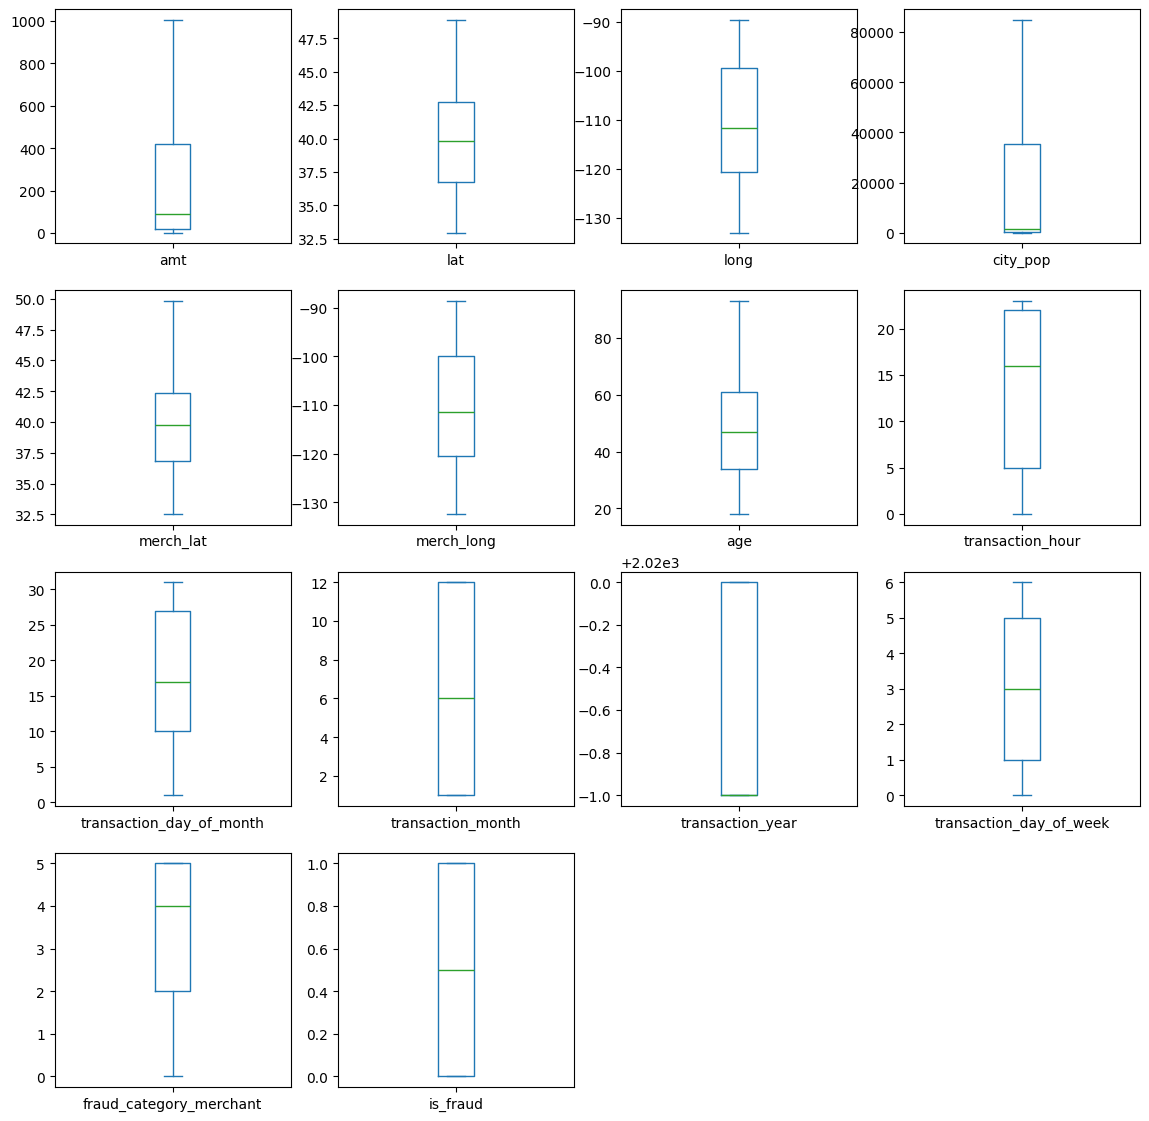

In [ ]:
# Diagrana boxplot para verificar que no hay Outliers
df_train_balanceado.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(14, 14))
plt.show()

Se obtiene los nuevos valores de train sin valores Outliers

In [ ]:
# X_train todas las columnas de df_train_balanceado menos 'is_fraud'
X_train_sin_atipico = df_train_balanceado.drop('is_fraud', axis=1)

In [ ]:
# y_train solo columna 'is_fraud' de df_train_balanceado
y_train_sin_atipico =  df_train_balanceado['is_fraud']

**Los datos están listos en:**

X_train: datos train con atípicos, balanceados

y_train: datos train con atípicos, balanceados

X_train_sin_atipico: datos train sin atípicos, balanceados

y_train_sin_atipico: datos train sin atípicos, balanceados

X_test: datos de test

y_test: datos de test


**Nota 1:**

Se usa los train de acuerdo al algoritmo si soporta o no datos atípicos, en relación al test no se ha manejado ni balanceo ni eliminación de atípicos.

Se hace uso de StandarScaler a las X tanto de X_train como X_test después de la partición de datos y antes del entrenamiento de los modelos.

Pero NO se escala a los algoritmos que no son necesarios escalar las variables como árbol de decisión, random forest y gradient boosting.



**Nota 2:**

**Entradas seleccionadas:**

'category', 'amt', 'city', 'state',
       'age', 'transaction_hour',
       'transaction_day_of_month', 'transaction_day_of_week',
       'profession_group', 'fraud_category_merchant'
       
**Salida:**
      'is_fraud'

**Conclusiones antes del modelamiento**

1. Se eliminan del Xtrain, Xtest las variables que no se consideran en del entrenamiento.

2. Se usa el escalador StandarScaler si lo necesita el algoritmo

3. Se usa labelencoder a las variables 'category', 'profession_group', 'city', 'state'

4. La variable 'fraud_category_merchant' ya tiene su peso 0:no fraude, 1:muy bajo fraude, 2:bajo fraude, 3:intemedio fraude, 4:alto fraude, 5:muy alto fraude, además es ya de tipo entero por lo que no necesita ser codificada
       

# Selección de Variables y Codificación

In [ ]:
# X_train_sin_atipico, y_train_sin_atipico, X_test, y_test ===> VARIABLES A USAR

In [ ]:
# copia de X_train_sin_atipico y X_test
X_train_copy = X_train_sin_atipico.copy()
X_test_copy = X_test.copy()

In [ ]:
# copia de X_train con atipico
X_train_copy2 = X_train.copy()

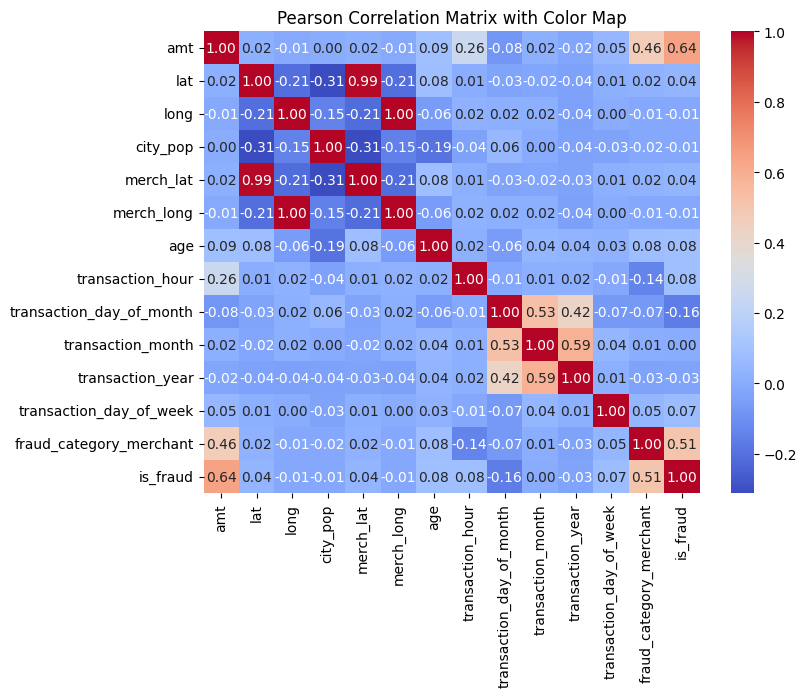

In [ ]:
# Select numerical columns from df_train_balanceado
numerical_cols = df_train_balanceado.select_dtypes(include=['number'])

# Calculate the Pearson correlation matrix
correlation_matrix = numerical_cols.corr()

# Create a heatmap with a color map
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix with Color Map')
plt.show()

In [ ]:
# Obtener las columnas numéricas de X_train_sin_atipico
columnas_numericas = X_train_sin_atipico.select_dtypes(include=['number']).columns

# Imprimir las columnas numéricas
columnas_numericas

Index(['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'age',
       'transaction_hour', 'transaction_day_of_month', 'transaction_month',
       'transaction_year', 'transaction_day_of_week',
       'fraud_category_merchant'],
      dtype='object')

In [ ]:
# Obtener las columnas categóricas  X_train_sin_atipico
columnas_categoricas = X_train_sin_atipico.select_dtypes(include=['object']).columns

# Imprimir las columnas categóricas
columnas_categoricas

Index(['category', 'city', 'state', 'profession_group'], dtype='object')

In [ ]:
# Inicializa LabelEncoder
encoder = LabelEncoder()

# Ajusta y transforma la columna 'category' en X_train_sin_atipico
X_train_sin_atipico['category'] = encoder.fit_transform(X_train_sin_atipico['category'])

# Ajusta y transforma la columna 'city' en X_train_sin_atipico
X_train_sin_atipico['city'] = encoder.fit_transform(X_train_sin_atipico['city'])

# Ajusta y transforma la columna 'state' en X_train_sin_atipico
X_train_sin_atipico['state'] = encoder.fit_transform(X_train_sin_atipico['state'])

# Ajusta y transforma la columna 'profession_group' en X_train_sin_atipico
X_train_sin_atipico['profession_group'] = encoder.fit_transform(X_train_sin_atipico['profession_group'])

In [ ]:
# Ajusta y transforma la columna 'category'
X_train['category'] = encoder.fit_transform(X_train['category'])

# Ajusta y transforma la columna 'city'
X_train['city'] = encoder.fit_transform(X_train['city'])

# Ajusta y transforma la columna 'state'
X_train['state'] = encoder.fit_transform(X_train['state'])

# Ajusta y transforma la columna 'profession_group'
X_train['profession_group'] = encoder.fit_transform(X_train['profession_group'])

In [ ]:
# Transforma la columna 'category' en X_test
X_test['category'] = encoder.fit_transform(X_test['category'])

# Transforma la columna 'city' en X_test
X_test['city'] = encoder.fit_transform(X_test['city'])

# Transforma la columna 'state' en X_test
X_test['state'] = encoder.fit_transform(X_test['state'])

# Transforma la columna 'profession_group'
X_test['profession_group'] = encoder.fit_transform(X_test['profession_group'])

In [ ]:
# valores minimos y maximos de X_train_sin_atipico

print("Valores mínimos y máximos de 'category' en X_train_sin_atipico:")
print(X_train_sin_atipico['category'].min())
print(X_train_sin_atipico['category'].max())

print("\nValores mínimos y máximos de 'city' en X_train_sin_atipico:")
print(X_train_sin_atipico['city'].min())
print(X_train_sin_atipico['city'].max())

print("\nValores mínimos y máximos de 'state' en X_train_sin_atipico:")
print(X_train_sin_atipico['state'].min())
print(X_train_sin_atipico['state'].max())

print("\nValores mínimos y máximos de 'profession_group' en X_train_sin_atipico:")
print(X_train_sin_atipico['profession_group'].min())
print(X_train_sin_atipico['profession_group'].max())

Valores mínimos y máximos de 'category' en X_train_sin_atipico:
0
13

Valores mínimos y máximos de 'city' en X_train_sin_atipico:
0
175

Valores mínimos y máximos de 'state' en X_train_sin_atipico:
0
12

Valores mínimos y máximos de 'profession_group' en X_train_sin_atipico:
0
6


In [ ]:
# valores minimos y maximos de X_train

print("Valores mínimos y máximos de 'category' en X_train:")
print(X_train['category'].min())
print(X_train['category'].max())

print("\nValores mínimos y máximos de 'city' en X_train:")
print(X_train['city'].min())
print(X_train['city'].max())

print("\nValores mínimos y máximos de 'state' en X_train:")
print(X_train['state'].min())
print(X_train['state'].max())

print("\nValores mínimos y máximos de 'profession_group' en X_train:")
print(X_train['profession_group'].min())
print(X_train['profession_group'].max())

Valores mínimos y máximos de 'category' en X_train:
0
13

Valores mínimos y máximos de 'city' en X_train:
0
175

Valores mínimos y máximos de 'state' en X_train:
0
12

Valores mínimos y máximos de 'profession_group' en X_train:
0
6


In [ ]:
# valores minimos y maximos de X_test

print("Valores mínimos y máximos de 'category' en X_test:")
print(X_test['category'].min())
print(X_test['category'].max())

print("\nValores mínimos y máximos de 'city' en X_test:")
print(X_test['city'].min())
print(X_test['city'].max())

print("\nValores mínimos y máximos de 'state' en X_test:")
print(X_test['state'].min())
print(X_test['state'].max())

print("\nValores mínimos y máximos de 'profession_group' en X_test:")
print(X_test['profession_group'].min())
print(X_test['profession_group'].max())

Valores mínimos y máximos de 'category' en X_test:
0
13

Valores mínimos y máximos de 'city' en X_test:
0
174

Valores mínimos y máximos de 'state' en X_test:
0
12

Valores mínimos y máximos de 'profession_group' en X_test:
0
6


**Recordando Variables consesuadas**

'category', 'amt', 'city', 'state', 'age',
    'transaction_hour', 'transaction_day_of_month', 'transaction_day_of_week',
    'profession_group', 'fraud_category_merchant'

In [ ]:
# escoge las columnas definitivas para el train sin outliers
X_train_sin_atipico_filtro = X_train_sin_atipico[['category', 'amt', 'city', 'state', 'age',
                                                  'transaction_hour', 'transaction_day_of_month', 'transaction_day_of_week',
                                                  'profession_group', 'fraud_category_merchant']]

In [ ]:
#escoge las columnas definitivas para el train con outliers
X_train_filtro = X_train[['category', 'amt', 'city', 'state', 'age',
                                                  'transaction_hour', 'transaction_day_of_month', 'transaction_day_of_week',
                                                  'profession_group', 'fraud_category_merchant']]

In [ ]:
# escoge las columnas definitivas para el test con outliers
X_test_filtro = X_test[['category', 'amt', 'city', 'state', 'age',
                        'transaction_hour', 'transaction_day_of_month', 'transaction_day_of_week',
                        'profession_group', 'fraud_category_merchant']]


# Escalamiento de Variables

In [ ]:
# Guardar las columnas originales
columnas_originales = X_train_sin_atipico_filtro.columns

# Se crea el escalador
escalador = StandardScaler()

# Se escala los datos de entrenamiento
X_train_sin_atipico_filtro_scaler = pd.DataFrame(escalador.fit_transform(X_train_sin_atipico_filtro), columns=columnas_originales)

# Se escala los datos de prueba
X_test_filtro_scaler = pd.DataFrame(escalador.transform(X_test_filtro), columns=columnas_originales)

X_train_sin_atipico_filtro_scaler.columns

Index(['category', 'amt', 'city', 'state', 'age', 'transaction_hour',
       'transaction_day_of_month', 'transaction_day_of_week',
       'profession_group', 'fraud_category_merchant'],
      dtype='object')

# Modelamiento

## Regresión Logística

### Entrenamiento

In [ ]:
# Crea el modelo
modelo_RL = LogisticRegression(random_state=56)

In [ ]:
# Parámetros en el dicionario param_distRL para luego usar en RandomSearchCV
param_distRL = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500],
    'class_weight': [None, 'balanced']
}

In [ ]:
# RandomizedSearchCV
random_search_RL = RandomizedSearchCV(estimator=modelo_RL, param_distributions=param_distRL,
                                      n_iter=50, cv=5, n_jobs=-1, verbose=4, random_state=56)

# Se realiza el entrenamiento
random_search_RL.fit(X_train_sin_atipico_filtro_scaler, y_train_sin_atipico)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=56),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100],
                                        'class_weight': [None, 'balanced'],
                                        'max_iter': [100, 200, 500],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga']},
                   random_state=56, verbose=4)

In [ ]:
# Mejores hiperparámetros encontrados
print("\nMejores hiperparámetros encontrados:")
print(random_search_RL.best_params_)

# Mejor score obtenido
print("\nMejor score obtenido:")
print(random_search_RL.best_score_)


Mejores hiperparámetros encontrados:
{'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 100, 'class_weight': None, 'C': 0.01}

Mejor score obtenido:
0.8344742063492063


In [ ]:
# Seleccionando los mejores estimadores
modelo_best_randomRL = random_search_RL.best_estimator_

# Se realiza el entreanamiento (fit)
modelo_best_randomRL.fit(X = X_train_sin_atipico_filtro_scaler, y = y_train_sin_atipico)

# Se realiza la predicción (predict)
y_pred_testRL = modelo_best_randomRL.predict(X = X_test_filtro_scaler)
y_pred_testRL

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
# convierte los valores mayores a 0.5 a 1 sino 0 de y_pred_testRL
y_pred_testRL = np.where(y_pred_testRL > 0.5, 1, 0)
y_pred_testRL

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
# Creando un DataFrame para mostrar y_test junto con las predicciones y_pred
df_resultadosRL_test = pd.DataFrame({'y_test': y_test, 'y_pred_test': y_pred_testRL})

# Imprimir el DataFrame con los resultados
print(df_resultadosRL_test)

      y_test  y_pred_test
0          0            0
1          0            0
2          0            0
3          0            0
4          0            1
...      ...          ...
2872       0            0
2873       0            1
2874       0            0
2875       0            1
2876       0            0

[2877 rows x 2 columns]


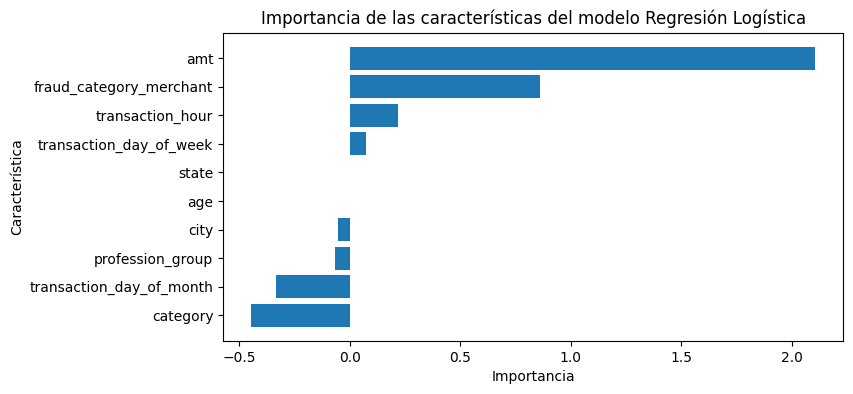

In [ ]:
# Obtener la importancia de las características
feature_importances = modelo_best_randomRL.coef_[0]

# Obtener los nombres de las características
feature_names = X_train_sin_atipico_filtro_scaler.columns

# Crear un DataFrame para facilitar la visualización
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Ordenar por importancia
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(8, 4))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las características del modelo Regresión Logística')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la característica más importante en la parte superior
plt.show()

### Explicabilidad

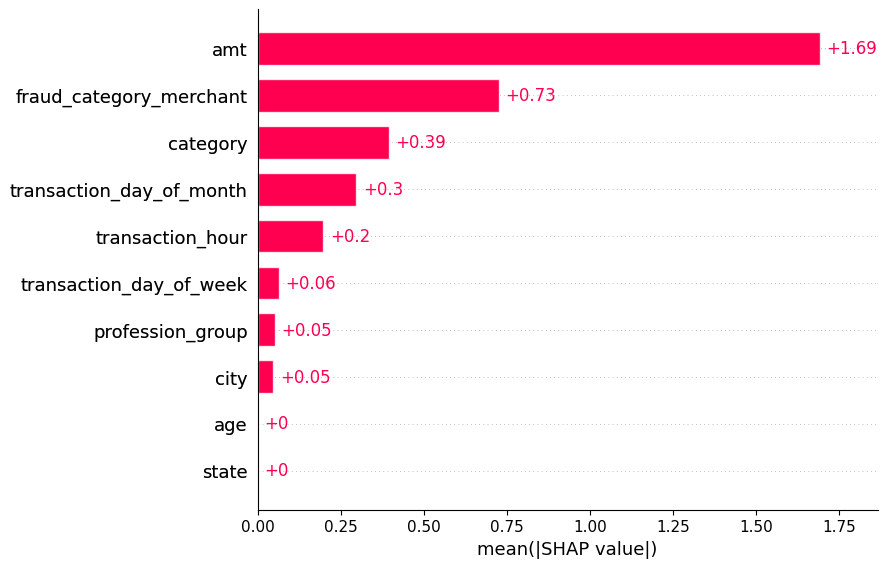

In [ ]:
explainer = shap.Explainer(modelo_best_randomRL, X_train_sin_atipico_filtro_scaler,feature_names=feature_names)
shap_values = explainer(X_train_sin_atipico_filtro_scaler)
shap.plots.bar(shap_values[:,:,0], max_display=X_train_sin_atipico_filtro_scaler.shape[1])

### Evaluación

In [ ]:
# Calcula métricas
accuracy = accuracy_score(y_test, y_pred_testRL)
precision = precision_score(y_test, y_pred_testRL)
recall = recall_score(y_test, y_pred_testRL)
f1 = f1_score(y_test, y_pred_testRL)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_testRL).ravel()
specificity = tn / (tn + fp)

print(f"Accuracy: {accuracy}")
print(f"Precision (sensibilidad): {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Specificity: {specificity}")

Accuracy: 0.8807785888077859
Precision (sensibilidad): 0.512621359223301
Recall: 0.7415730337078652
F1-score: 0.6061997703788748
Specificity: 0.9004363347877826


In [ ]:
# Tasa de falsos negativos
tasa_falsos_negativos = fn / (fn + tp)

# Tasa de falsos positivos
tasa_falsos_positivos = fp / (fp + tn)

print(f"Tasa de falsos negativos: {tasa_falsos_negativos}")
print(f"Tasa de falsos positivos: {tasa_falsos_positivos}")

Tasa de falsos negativos: 0.25842696629213485
Tasa de falsos positivos: 0.09956366521221738



Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      2521
           1       0.51      0.74      0.61       356

    accuracy                           0.88      2877
   macro avg       0.74      0.82      0.77      2877
weighted avg       0.91      0.88      0.89      2877



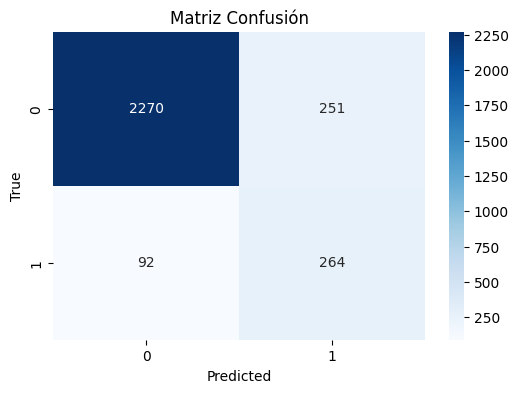

In [ ]:
# Reporte matriz de clasificación
print("\nClassification Report:")
print(classification_report(y_test, y_pred_testRL))

# Matriz Confusion
cm = confusion_matrix(y_test, y_pred_testRL)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz Confusión")
plt.show()

AUC: 0.8210046842478239


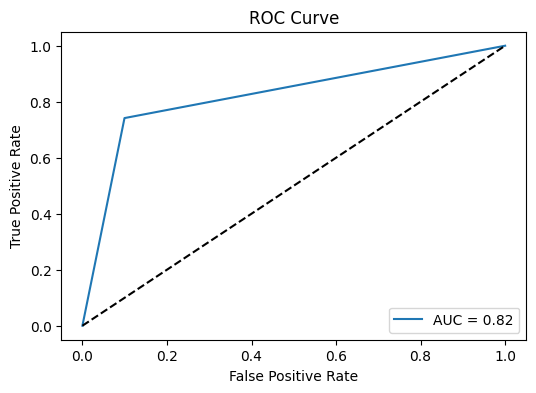

In [ ]:
# AUC y Curva ROC
auc = roc_auc_score(y_test, y_pred_testRL)
print(f"AUC: {auc}")
fpr, tpr, thresholds = roc_curve(y_test, y_pred_testRL)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

### Reducción de dimensionalidad

In [ ]:
# Reduce el conjunto de datos a 2D usando t-SNE
# Estos sets de datos se utilizaran mas adelante para realizar la grafica de frontera de desicion
tsne = TSNE(n_components=2, random_state=56)
X_train_tsne = tsne.fit_transform(X_train_sin_atipico_filtro_scaler)
X_test_tsne = tsne.fit_transform(X_test_filtro_scaler)

### Visualización de clases y Frontera de decisión

In [ ]:
# Predicciones en los datos de prueba utilizando el modelo ya entrenado
y_pred_tsneRL = modelo_best_randomRL.predict(X_test_filtro_scaler)

# Crear un DataFrame para facilitar la visualización
trainRL = pd.DataFrame(X_train_tsne, columns=['Component 1', 'Component 2'])
trainRL['is_fraud'] = y_train_sin_atipico  # Agregar la columna is_fraud al DataFrame de entrenamiento

testRL = pd.DataFrame(X_test_tsne, columns=['Component 1', 'Component 2'])
testRL['Predicted'] = y_pred_tsneRL  # Agregar las predicciones al DataFrame de prueba# Configuración de los gráficos

In [ ]:
def frontera_decision(data_train, data_test):
  # Configuración de los gráficos
  fig, axs = plt.subplots(1, 2, figsize=(12, 5))

  # Graficar datos de entrenamiento
  sns.scatterplot(x='Component 1', y='Component 2', hue='is_fraud',
                palette=['blue', 'red'], alpha=0.6, data=data_train, ax=axs[0],
                legend=False)  # Desactiva la leyenda automática
  axs[0].set_title('Datos de Entrenamiento')
  axs[0].set_xlabel('Componente t-SNE 1')
  axs[0].set_ylabel('Componente t-SNE 2')

  # Agregar la leyenda manualmente para el gráfico de entrenamiento
  handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Fraude (0)'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Fraude (1)')]
  axs[0].legend(handles=handles, title='Clase', loc='upper right')

  # Graficar datos de prueba
  sns.scatterplot(x='Component 1', y='Component 2', hue='Predicted',
                palette=['blue', 'red'], alpha=0.8, data=data_test, marker='o', ax=axs[1],
                legend=False)  # Desactiva la leyenda automática
  axs[1].set_title('Datos de Prueba y Predicciones')
  axs[1].set_xlabel('Componente t-SNE 1')
  axs[1].set_ylabel('Componente t-SNE 2')

  # Agregar la leyenda manualmente para el gráfico de prueba
  handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Fraude (0)'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Fraude (1)')]
  axs[1].legend(handles=handles, title='Predicción', loc='upper right')

  plt.tight_layout()
  plt.show()
  return

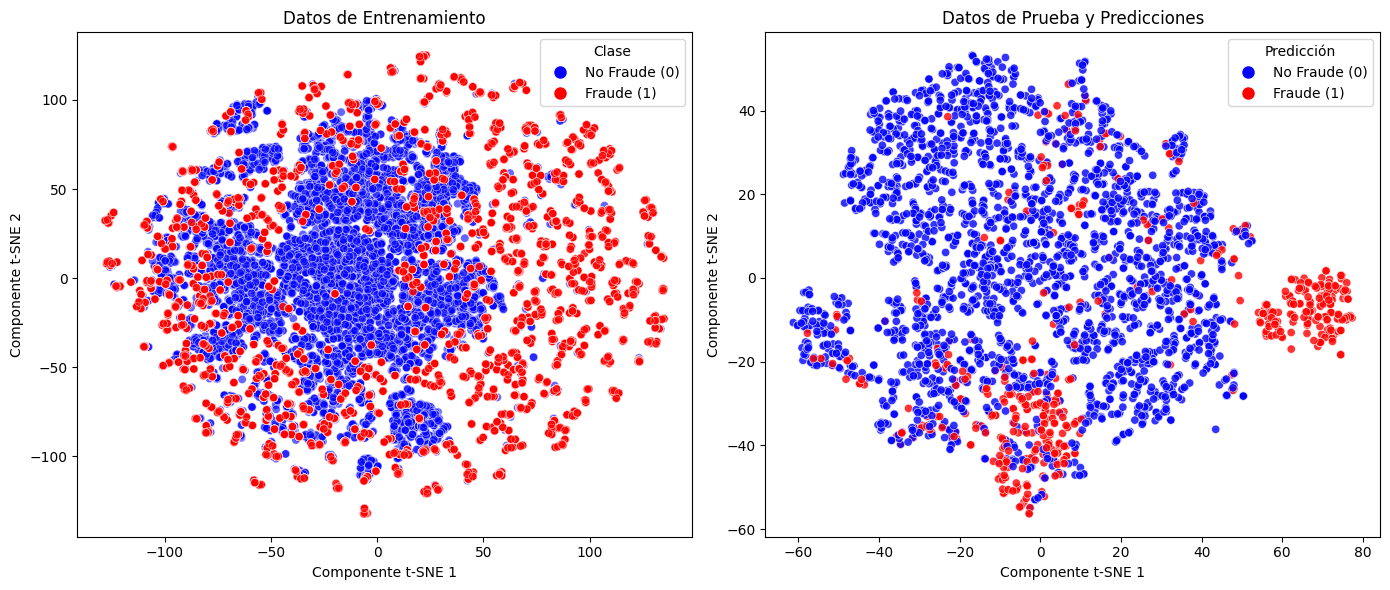

In [ ]:
frontera_decision(trainRL,testRL)

## Naive Bayes

### Entrenamiento

In [ ]:
# Crea el modelo
modelo_NB = GaussianNB()

In [ ]:
# parámetros en el dicionario param_distRL para luego usar en RandomSearchCV
num_classes = len(np.unique(y_train_sin_atipico))

param_distNB = {
    'var_smoothing': np.logspace(0, -9, num=100),  # Parámetro para ajustar
    'priors': [None] + [[1 / num_classes] * num_classes]  # Ejemplos de priors

}

In [ ]:
# RandomizedSearchCV
random_search_NB = RandomizedSearchCV(estimator=modelo_NB, param_distributions=param_distNB,
                                      n_iter=100, cv=5, n_jobs=-1, verbose=4, random_state=56)

# Se realiza el entrenamiento
random_search_NB.fit(X_train_sin_atipico_filtro, y_train_sin_atipico)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=GaussianNB(), n_iter=100, n_jobs=-1,
                   param_distributions={'priors': [None, [0.5, 0.5]],
                                        'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5....
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                   random_state=56, verbose=4)

In [ ]:
# Mejores hiperparámetros encontrados
print("\nMejores hiperparámetros encontrados:")
print(random_search_NB.best_params_)

# Mejor score obtenido
print("\nMejor score obtenido:")
print(random_search_NB.best_score_)


Mejores hiperparámetros encontrados:
{'var_smoothing': 0.0001519911082952933, 'priors': None}

Mejor score obtenido:
0.8627480158730159


In [ ]:
# Seleccionando los mejores estimadores
modelo_best_randomNB = random_search_NB.best_estimator_

# Se realiza el entreanamiento (fit)
modelo_best_randomNB.fit(X = X_train_sin_atipico_filtro, y = y_train_sin_atipico)

# Se realiza la predicción (predict)
y_pred_testNB = modelo_best_randomNB.predict(X = X_test_filtro)
y_pred_testNB

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Creando un DataFrame para mostrar y_test junto con las predicciones y_pred
df_resultadosNB_test = pd.DataFrame({'y_test': y_test, 'y_pred_test': y_pred_testNB})

# Imprimir el DataFrame con los resultados
print(df_resultadosNB_test)

      y_test  y_pred_test
0          0            0
1          0            0
2          0            0
3          0            0
4          0            0
...      ...          ...
2872       0            0
2873       0            0
2874       0            0
2875       0            0
2876       0            0

[2877 rows x 2 columns]


### Explicabilidad

  0%|          | 0/20160 [00:00<?, ?it/s]

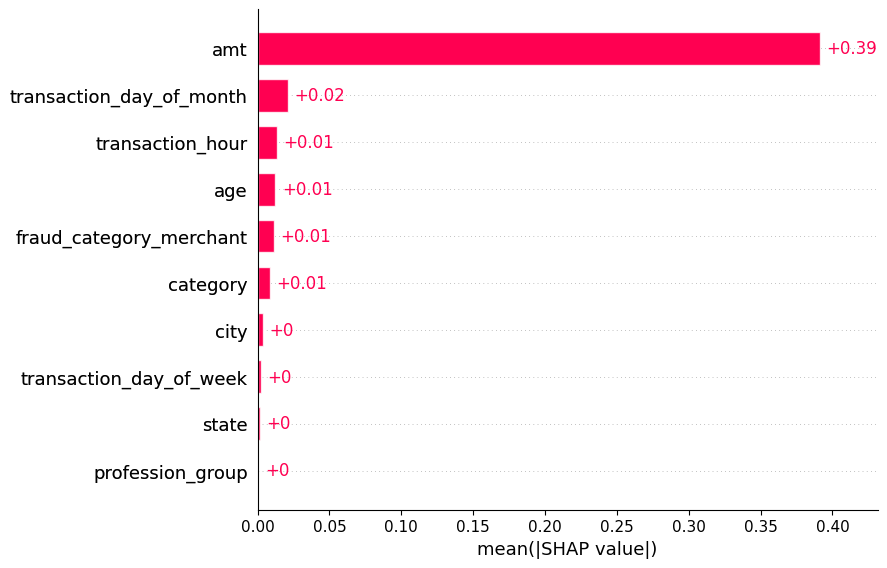

In [ ]:
K = 4  # Número de muestras que deseas usar para el fondo
X_background = shap.sample(X_train_sin_atipico_filtro, K)

# Crear el objeto explainer utilizando el conjunto de fondo reducido
explainer = shap.KernelExplainer(modelo_best_randomNB.predict_proba, X_background)
shap_values = explainer(X_train_sin_atipico_filtro)
shap.plots.bar(shap_values[:,:,0], max_display=X_train_sin_atipico_filtro.shape[1])

### Evaluación

In [ ]:
# Calcula métricas
accuracy = accuracy_score(y_test, y_pred_testNB)
precision = precision_score(y_test, y_pred_testNB)
recall = recall_score(y_test, y_pred_testNB)
f1 = f1_score(y_test, y_pred_testNB)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_testNB).ravel()
specificity = tn / (tn + fp)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Specificity: {specificity}")

Accuracy: 0.9440389294403893
Precision: 0.8018575851393189
Recall: 0.7275280898876404
F1-score: 0.7628865979381443
Specificity: 0.974613248710829


In [ ]:
# Tasa de falsos negativos
tasa_falsos_negativos = fn / (fn + tp)

# Tasa de falsos positivos
tasa_falsos_positivos = fp / (fp + tn)

print(f"Tasa de falsos negativos: {tasa_falsos_negativos}")
print(f"Tasa de falsos positivos: {tasa_falsos_positivos}")

Tasa de falsos negativos: 0.27247191011235955
Tasa de falsos positivos: 0.025386751289170964



Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2521
           1       0.80      0.73      0.76       356

    accuracy                           0.94      2877
   macro avg       0.88      0.85      0.87      2877
weighted avg       0.94      0.94      0.94      2877



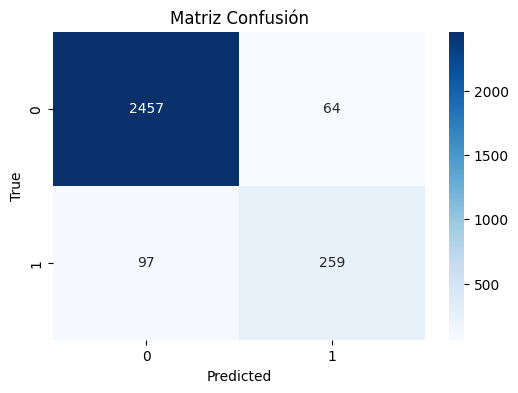

In [ ]:
# Reporte matriz de clasificación
print("\nClassification Report:")
print(classification_report(y_test, y_pred_testNB))

# Matriz Confusion
cm = confusion_matrix(y_test, y_pred_testNB)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz Confusión")
plt.show()

AUC: 0.8510706692992347


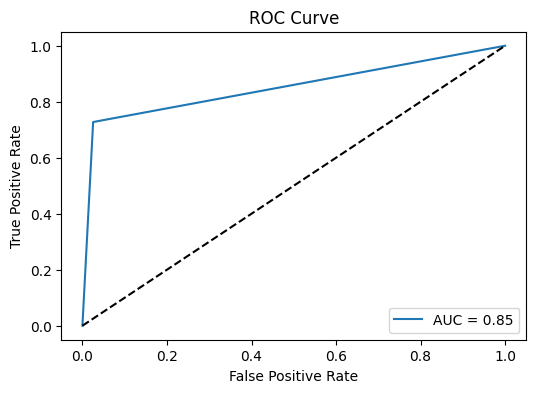

In [ ]:
# AUC y Curva ROC
auc = roc_auc_score(y_test, y_pred_testNB)
print(f"AUC: {auc}")
fpr, tpr, thresholds = roc_curve(y_test, y_pred_testNB)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

### Reducción de dimensionalidad

In [ ]:
# Reduce el conjunto de datos a 2D usando t-SNE
# Estos sets de datos se utilizaran mas adelante para realizar la grafica de frontera de desicion
tsne = TSNE(n_components=2, random_state=56)
X_train_tsne = tsne.fit_transform(X_train_sin_atipico_filtro)
X_test_tsne = tsne.fit_transform(X_test_filtro)

### Visualización de clases y Frontera de decisión

In [ ]:
# Predicciones en los datos de prueba utilizando el modelo ya entrenado
y_pred_tsneNB = modelo_best_randomNB.predict(X_test_filtro)

# Crear un DataFrame para facilitar la visualización
trainNB = pd.DataFrame(X_train_tsne, columns=['Component 1', 'Component 2'])
trainNB['is_fraud'] = y_train_sin_atipico  # Agregar la columna is_fraud al DataFrame de entrenamiento

testNB = pd.DataFrame(X_test_tsne, columns=['Component 1', 'Component 2'])
testNB['Predicted'] = y_pred_tsneNB  # Agregar las predicciones al DataFrame de prueba# Configuración de los gráficos

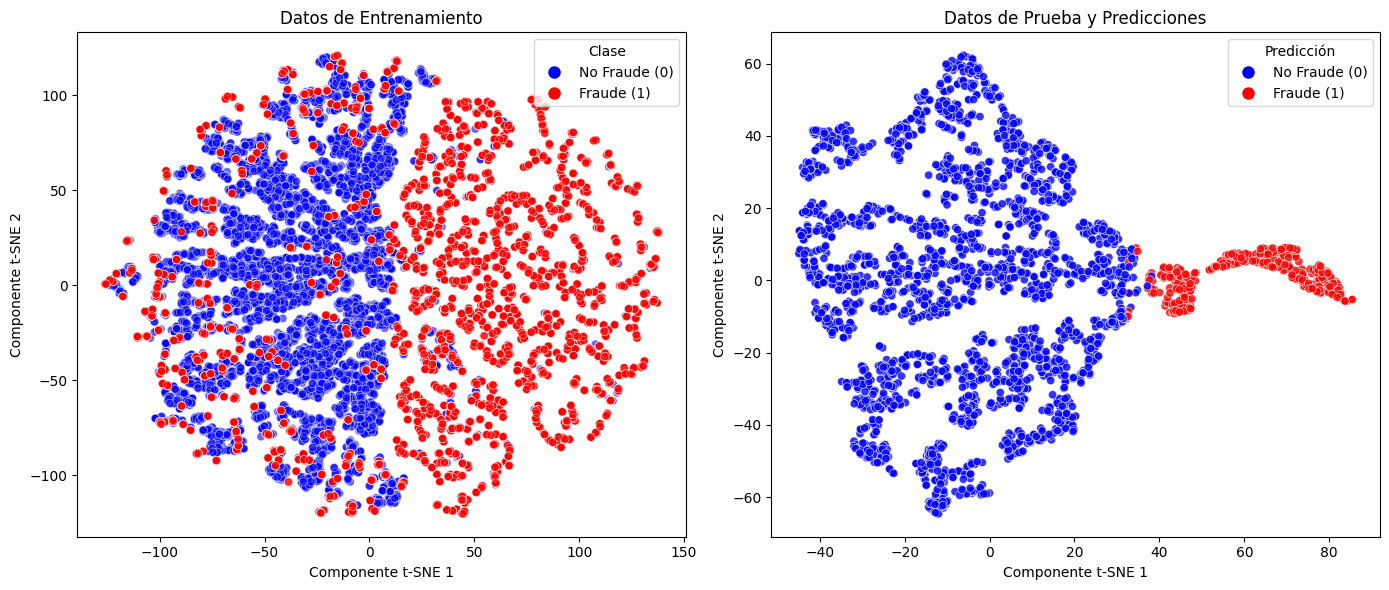

In [ ]:
frontera_decision(trainNB,testNB)

## SVM

### Entrenamiento

In [ ]:
# Crea el modelo
modelo_SVM = SVC(random_state=56)

In [ ]:
# Definir el diccionario de hiperparámetros para el modelo SVC
param_distSVC = {
    "C": [0.1, 1, 10, 100],  # Rango de valores de regularización
    "kernel": ["linear", "poly", "rbf", "sigmoid"],  # Tipo de kernel
    "degree": [2, 3, 4],  # Grado para el kernel polinomial (solo si kernel='poly')
    "gamma": ["scale", "auto"],  # Coeficiente para 'rbf', 'poly', y 'sigmoid'
    "coef0": [0, 0.1, 0.5, 1],  # Término independiente en kernels 'poly' y 'sigmoid'
    "tol": [1e-3, 1e-4, 1e-5]  # Tolerancia para el criterio de parada
}

In [ ]:
# RandomizedSearchCV
random_search_SVC = RandomizedSearchCV(estimator=modelo_SVM, param_distributions=param_distSVC,
                                      n_iter=50, cv=5, n_jobs=-1, verbose=4, random_state=56)

# Se realiza el entrenamiento
random_search_SVC.fit(X_train_sin_atipico_filtro_scaler, y_train_sin_atipico)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=5, estimator=SVC(random_state=56), n_iter=50, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'coef0': [0, 0.1, 0.5, 1],
                                        'degree': [2, 3, 4],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid'],
                                        'tol': [0.001, 0.0001, 1e-05]},
                   random_state=56, verbose=4)

In [ ]:
# Mejores hiperparámetros encontrados
print("\nMejores hiperparámetros encontrados:")
print(random_search_SVC.best_params_)

# Mejor score obtenido
print("\nMejor score obtenido:")
print(random_search_SVC.best_score_)


Mejores hiperparámetros encontrados:
{'tol': 0.001, 'kernel': 'rbf', 'gamma': 'scale', 'degree': 2, 'coef0': 0, 'C': 100}

Mejor score obtenido:
0.9801091269841269


In [ ]:
# Seleccionando los mejores estimadores
modelo_best_randomSVC = random_search_SVC.best_estimator_

# Se realiza el entreanamiento (fit)
modelo_best_randomSVC.fit(X = X_train_sin_atipico_filtro_scaler, y = y_train_sin_atipico)

# Se realiza la predicción (predict)
y_pred_testSVC = modelo_best_randomSVC.predict(X = X_test_filtro_scaler)
y_pred_testSVC

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Creando un DataFrame para mostrar y_test junto con las predicciones y_pred
df_resultadosSVC_test = pd.DataFrame({'y_test': y_test, 'y_pred_test': y_pred_testSVC})

# Imprimir el DataFrame con los resultados
print(df_resultadosSVC_test)

      y_test  y_pred_test
0          0            0
1          0            0
2          0            0
3          0            0
4          0            0
...      ...          ...
2872       0            0
2873       0            0
2874       0            0
2875       0            0
2876       0            0

[2877 rows x 2 columns]


### Explicabilidad

In [ ]:
# Obtener los nombres de las características
feature_names = X_train_sin_atipico_filtro_scaler.columns
explainer = shap.Explainer(modelo_best_randomSVC, X_train_sin_atipico_filtro_scaler,feature_names=feature_names)
shap_values = explainer(X_train_sin_atipico_filtro_scaler)
shap.plots.bar(shap_values[:,:,0], max_display=X_train_sin_atipico_filtro_scaler.shape[1])

In [ ]:
K = 4  # Número de muestras que deseas usar para el fondo
X_background = shap.sample(X_train_sin_atipico_filtro_scaler, K)

# Crear el objeto explainer utilizando el conjunto de fondo reducido
explainer = shap.KernelExplainer(modelo_best_randomSVC.predict_proba, X_background)
shap_values = explainer(X_train_sin_atipico_filtro_scaler)
shap.plots.bar(shap_values[:,:,0], max_display=X_train_sin_atipico_filtro_scaler.shape[1])

### Evaluación

In [ ]:
# Calcula métricas
accuracy = accuracy_score(y_test, y_pred_testSVC)
precision = precision_score(y_test, y_pred_testSVC)
recall = recall_score(y_test, y_pred_testSVC)
f1 = f1_score(y_test, y_pred_testSVC)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_testSVC).ravel()
specificity = tn / (tn + fp)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Specificity: {specificity}")

Accuracy: 0.9454292665971498
Precision: 0.7544757033248082
Recall: 0.8286516853932584
F1-score: 0.7898259705488622
Specificity: 0.9619198730662436


In [ ]:
# Tasa de falsos negativos
tasa_falsos_negativos = fn / (fn + tp)

# Tasa de falsos positivos
tasa_falsos_positivos = fp / (fp + tn)

print(f"Tasa de falsos negativos: {tasa_falsos_negativos}")
print(f"Tasa de falsos positivos: {tasa_falsos_positivos}")

Tasa de falsos negativos: 0.17134831460674158
Tasa de falsos positivos: 0.038080126933756446



Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2521
           1       0.75      0.83      0.79       356

    accuracy                           0.95      2877
   macro avg       0.86      0.90      0.88      2877
weighted avg       0.95      0.95      0.95      2877



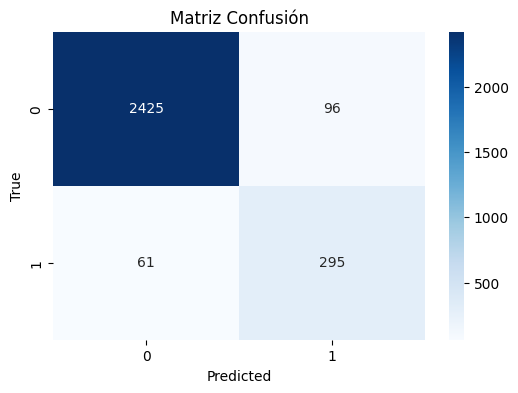

In [ ]:
# Reporte matriz de clasificación
print("\nClassification Report:")
print(classification_report(y_test, y_pred_testSVC))

# Matriz Confusion
cm = confusion_matrix(y_test, y_pred_testSVC)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz Confusión")
plt.show()

AUC: 0.8952857792297509


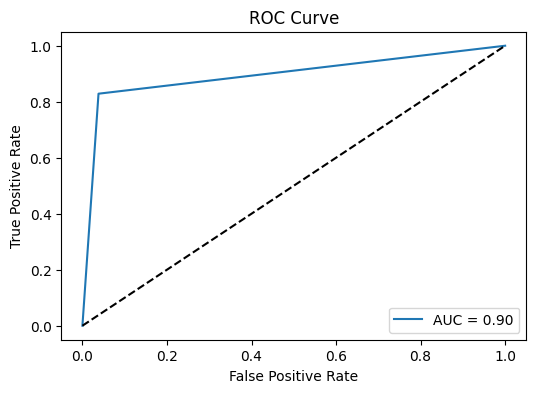

In [ ]:
# AUC y Curva ROC
auc = roc_auc_score(y_test, y_pred_testSVC)
print(f"AUC: {auc}")
fpr, tpr, thresholds = roc_curve(y_test, y_pred_testSVC)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

### Reducción de dimensionalidad

In [ ]:
# Reduce el conjunto de datos a 2D usando t-SNE
# Estos sets de datos se utilizaran mas adelante para realizar la grafica de frontera de desicion
tsne = TSNE(n_components=2, random_state=56)
X_train_tsne = tsne.fit_transform(X_train_sin_atipico_filtro_scaler)
X_test_tsne = tsne.fit_transform(X_test_filtro_scaler)

### Visualización de clases y Frontera de decisión

In [ ]:
# Predicciones en los datos de prueba utilizando el modelo ya entrenado
y_pred_tsneSVC = modelo_best_randomSVC.predict(X_test_filtro_scaler)

# Crear un DataFrame para facilitar la visualización
trainSVC = pd.DataFrame(X_train_tsne, columns=['Component 1', 'Component 2'])
trainSVC['is_fraud'] = y_train_sin_atipico  # Agregar la columna is_fraud al DataFrame de entrenamiento

testSVC = pd.DataFrame(X_test_tsne, columns=['Component 1', 'Component 2'])
testSVC['Predicted'] = y_pred_tsneSVC  # Agregar las predicciones al DataFrame de prueba# Configuración de los gráficos

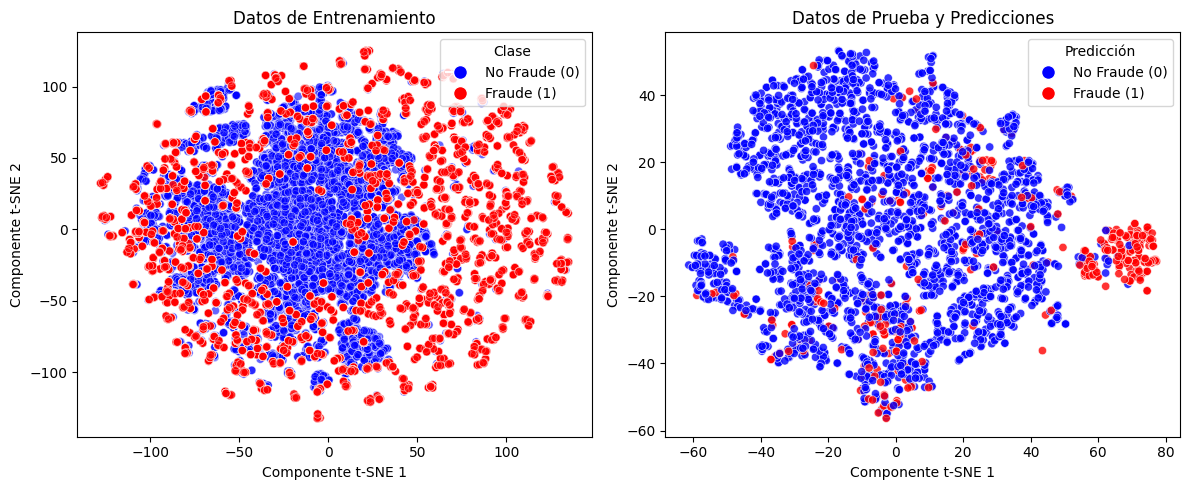

In [ ]:
frontera_decision(trainSVC,testSVC)

## KNN

### Entrenamiento

In [ ]:
# Crea el modelo
modelo_KNN = KNeighborsClassifier()

In [ ]:
# Definir el diccionario de hiperparámetros para el modelo KNN
param_distKNN = {
    "n_neighbors": [3, 5, 7, 9, 11],  # Número de vecinos a considerar
    "weights": ["uniform", "distance"],  # Tipo de peso aplicado a los vecinos
    "metric": ["euclidean", "manhattan", "minkowski"],  # Métrica de distancia
    "p": [1, 2]  # Parámetro de distancia para minkowski (p=1 es manhattan, p=2 es euclidean)
}

In [ ]:
# RandomizedSearchCV
random_search_KNN = RandomizedSearchCV(estimator=modelo_KNN, param_distributions=param_distKNN,
                                      n_iter=50, cv=5, n_jobs=-1, verbose=4, random_state=56)

# Se realiza el entrenamiento
random_search_KNN.fit(X_train_sin_atipico_filtro_scaler, y_train_sin_atipico)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=50, n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': [3, 5, 7, 9, 11],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=56, verbose=4)

In [ ]:
# Mejores hiperparámetros encontrados
print("\nMejores hiperparámetros encontrados:")
print(random_search_KNN.best_params_)

# Mejor score obtenido
print("\nMejor score obtenido:")
print(random_search_KNN.best_score_)


Mejores hiperparámetros encontrados:
{'weights': 'uniform', 'p': 1, 'n_neighbors': 3, 'metric': 'manhattan'}

Mejor score obtenido:
0.9700396825396826


In [ ]:
# Seleccionando los mejores estimadores
modelo_best_randomKNN = random_search_KNN.best_estimator_

# Se realiza el entreanamiento (fit)
modelo_best_randomKNN.fit(X = X_train_sin_atipico_filtro_scaler, y = y_train_sin_atipico)

# Se realiza la predicción (predict)
y_pred_testKNN = modelo_best_randomKNN.predict(X = X_test_filtro_scaler)
y_pred_testKNN

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Creando un DataFrame para mostrar y_test junto con las predicciones y_pred
df_resultadosKNN_test = pd.DataFrame({'y_test': y_test, 'y_pred_test': y_pred_testKNN})

# Imprimir el DataFrame con los resultados
print(df_resultadosKNN_test)

      y_test  y_pred_test
0          0            0
1          0            0
2          0            0
3          0            0
4          0            0
...      ...          ...
2872       0            0
2873       0            0
2874       0            0
2875       0            0
2876       0            0

[2877 rows x 2 columns]


In [ ]:
import pickle

# descarga el modelo en formato .pkl
with open('modelo_knn.pkl', 'wb') as archivo_pkl:
    pickle.dump(modelo_best_randomKNN, archivo_pkl)

### Explicabilidad

In [ ]:
# Obtener los nombres de las características
feature_names = X_train_sin_atipico_filtro_scaler.columns
explainer = shap.Explainer(modelo_best_randomKNN, X_train_sin_atipico_filtro_scaler,feature_names=feature_names)
shap_values = explainer(X_train_sin_atipico_filtro_scaler)
shap.plots.bar(shap_values[:,:,0], max_display=X_train_sin_atipico_filtro_scaler.shape[1])

In [ ]:
K = 4  # Número de muestras que deseas usar para el fondo
X_background = shap.sample(X_train_sin_atipico_filtro_scaler, K)

# Crear el objeto explainer utilizando el conjunto de fondo reducido
explainer = shap.KernelExplainer(modelo_best_randomKNN.predict_proba, X_background)
shap_values = explainer(X_train_sin_atipico_filtro_scaler)
shap.plots.bar(shap_values[:,:,0], max_display=X_train_sin_atipico_filtro_scaler.shape[1])

  0%|          | 0/20160 [00:00<?, ?it/s]

### Evaluación

In [ ]:
# Calcula métricas
accuracy = accuracy_score(y_test, y_pred_testKNN)
precision = precision_score(y_test, y_pred_testKNN)
recall = recall_score(y_test, y_pred_testKNN)
f1 = f1_score(y_test, y_pred_testKNN)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_testKNN).ravel()
specificity = tn / (tn + fp)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Specificity: {specificity}")

Accuracy: 0.9416058394160584
Precision: 0.7216981132075472
Recall: 0.8595505617977528
F1-score: 0.7846153846153846
Specificity: 0.953193177310591


In [ ]:
# Tasa de falsos negativos
tasa_falsos_negativos = fn / (fn + tp)

# Tasa de falsos positivos
tasa_falsos_positivos = fp / (fp + tn)

print(f"Tasa de falsos negativos: {tasa_falsos_negativos}")
print(f"Tasa de falsos positivos: {tasa_falsos_positivos}")

Tasa de falsos negativos: 0.1404494382022472
Tasa de falsos positivos: 0.046806822689408965



Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      2521
           1       0.72      0.86      0.78       356

    accuracy                           0.94      2877
   macro avg       0.85      0.91      0.88      2877
weighted avg       0.95      0.94      0.94      2877



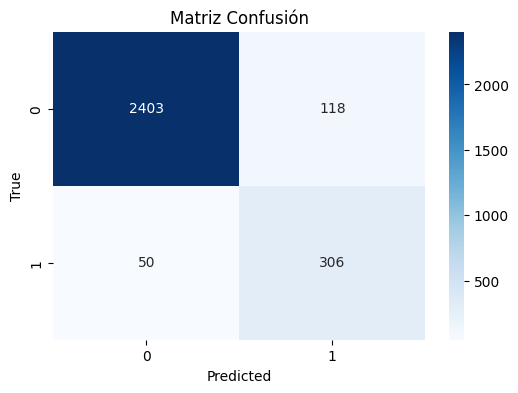

In [ ]:
# Reporte matriz de clasificación
print("\nClassification Report:")
print(classification_report(y_test, y_pred_testKNN))

# Matriz Confusion
cm = confusion_matrix(y_test, y_pred_testKNN)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz Confusión")
plt.show()

AUC: 0.9063718695541719


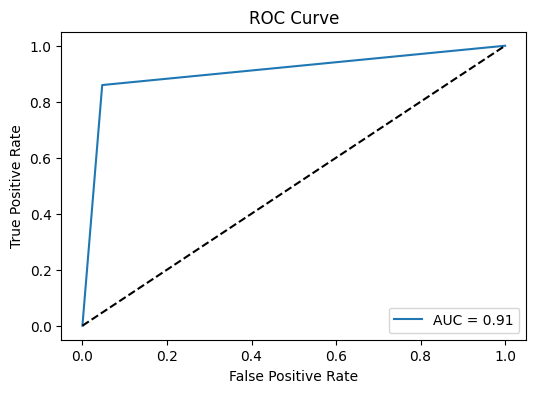

In [ ]:
# AUC y Curva ROC
auc = roc_auc_score(y_test, y_pred_testKNN)
print(f"AUC: {auc}")
fpr, tpr, thresholds = roc_curve(y_test, y_pred_testKNN)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

### Reducción de dimsensionalidad

In [ ]:
# Reduce el conjunto de datos a 2D usando t-SNE
# Estos sets de datos se utilizaran mas adelante para realizar la grafica de frontera de desicion
tsne = TSNE(n_components=2, random_state=56)
X_train_tsne = tsne.fit_transform(X_train_sin_atipico_filtro_scaler)
X_test_tsne = tsne.fit_transform(X_test_filtro_scaler)

### Visualización de clases y Frontera de decisión

In [ ]:
# Predicciones en los datos de prueba utilizando el modelo ya entrenado
y_pred_tsneKNN = modelo_best_randomKNN.predict(X_test_filtro_scaler)

# Crear un DataFrame para facilitar la visualización
trainKNN = pd.DataFrame(X_train_tsne, columns=['Component 1', 'Component 2'])
trainKNN['is_fraud'] = y_train_sin_atipico  # Agregar la columna is_fraud al DataFrame de entrenamiento

testKNN = pd.DataFrame(X_test_tsne, columns=['Component 1', 'Component 2'])
testKNN['Predicted'] = y_pred_tsneKNN  # Agregar las predicciones al DataFrame de prueba# Configuración de los gráficos

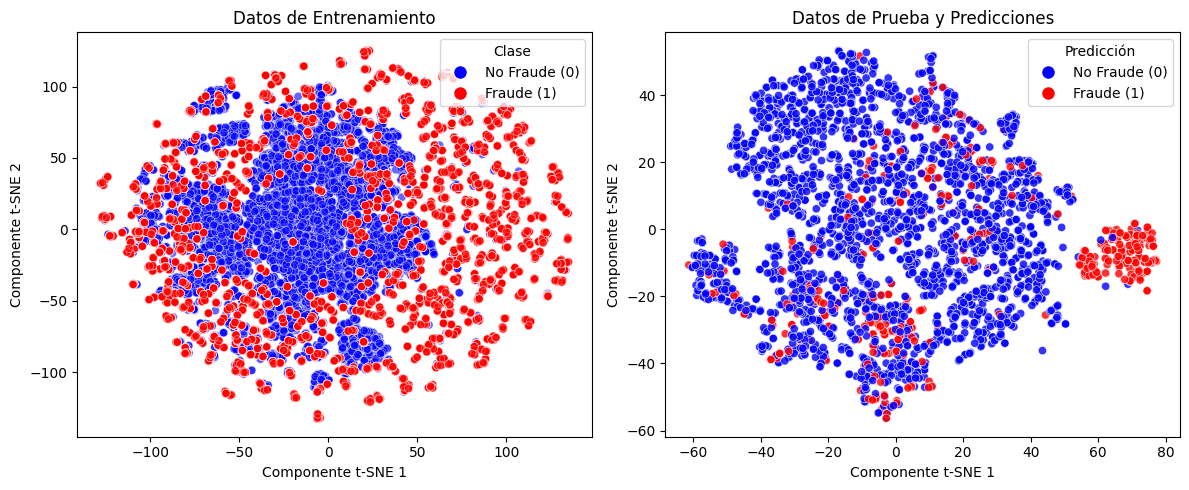

In [ ]:
frontera_decision(trainKNN,testKNN)

## Ärbol de decisión

### Entrenamiento

In [ ]:
# Crear el modelo
modelo_DT = DecisionTreeClassifier(random_state=56)

In [ ]:
# Espacio de hiperparámetros
paramsDT = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2', None]
}

In [ ]:
# Configuracion de RandomizedSearchCV
random_search_DT = RandomizedSearchCV(
    estimator=modelo_DT,
    param_distributions=paramsDT,
    n_iter=100,  # Número de combinaciones a probar
    scoring='roc_auc',  # Métrica de evaluación
    cv=5,  # Número de validaciones cruzadas
    verbose=1,  # Imprime el progreso
    random_state=144,
    n_jobs=-1  # Usa todos los núcleos disponibles
)

# Ejecuta la búsqueda en el conjunto de entrenamiento
random_search_DT.fit(X_train_filtro, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=56),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78189115aad0>,
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x781890f76980>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x781890a3c280>,
                                        'splitter': ['best', 'random']},
                   random_state=144, scoring='roc_auc', verbose=1)

In [ ]:
# Imprime los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", random_search_DT.best_params_)

# Mejor score obtenido
print("\nMejor score obtenido:")
print(random_search_DT.best_score_)

Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': 11, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'splitter': 'best'}

Mejor score obtenido:
0.9955010215891912


In [ ]:
# Seleccionando los mejores estimadores
modelo_best_randomDT = random_search_DT.best_estimator_

# Se realiza el entreanamiento (fit)
modelo_best_randomDT.fit(X = X_train_filtro, y = y_train)

# Se realiza la predicción (predict)
y_pred_testDT = modelo_best_randomDT.predict(X = X_test_filtro)
y_pred_testDT

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Creando un DataFrame para mostrar y_test junto con las predicciones y_pred
df_resultadosDT_test = pd.DataFrame({'y_test': y_test, 'y_pred_test': y_pred_testDT})

# Imprimir el DataFrame con los resultados
print(df_resultadosDT_test)

      y_test  y_pred_test
0          0            0
1          0            0
2          0            0
3          0            0
4          0            0
...      ...          ...
2872       0            0
2873       0            0
2874       0            0
2875       0            0
2876       0            0

[2877 rows x 2 columns]


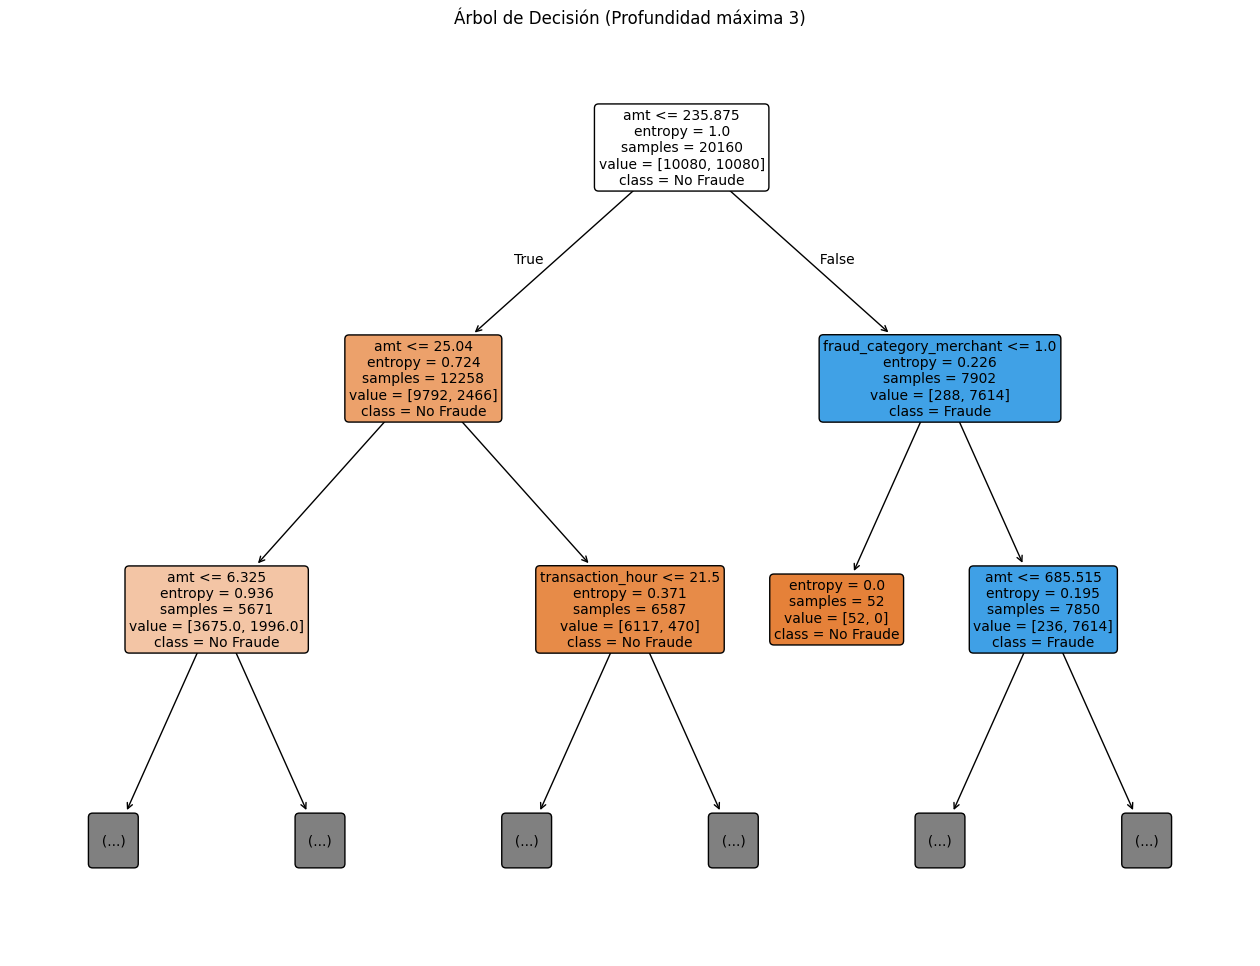

In [ ]:
# Configurar el tamaño de la figura (ancho, alto)
plt.figure(figsize=(16, 12))  # Aumenta el ancho y alto de la figura

plot_tree(
    modelo_best_randomDT,
    feature_names=X_train_filtro.columns,  # Nombres de las características
    class_names=['No Fraude', 'Fraude'],  # Etiquetas de las clases
    rounded=True,  # Bordes redondeados
    filled=True,  #relleno
    fontsize=10,   # Tamaño de la fuente
    max_depth=2    # Profundidad del árbol
)
plt.title("Árbol de Decisión (Profundidad máxima 3)")  # Título del gráfico
plt.show()

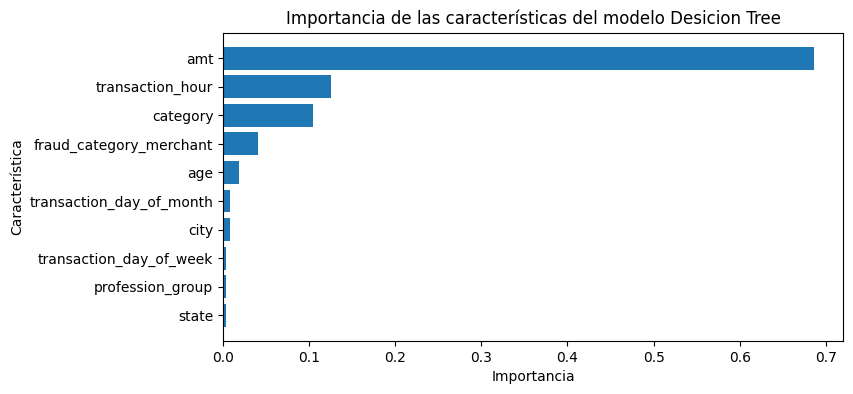

In [ ]:
# Obtener la importancia de las características
feature_importancesDT = modelo_best_randomDT.feature_importances_

# Obtener los nombres de las características
feature_names = X_train_filtro.columns

# Crear un DataFrame para facilitar la visualización
importanceDT = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importancesDT})

# Ordenar por importancia
importanceDT = importanceDT.sort_values(by='Importance', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(8, 4))
plt.barh(importanceDT['Feature'], importanceDT['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las características del modelo Desicion Tree')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la característica más importante en la parte superior
plt.show()

In [ ]:
import pickle

# descarga el modelo en formato .pkl
with open('modelo_dt.pkl', 'wb') as archivo_pkl:
    pickle.dump(modelo_best_randomDT, archivo_pkl)

### Explicabilidad

  0%|          | 0/20160 [00:00<?, ?it/s]

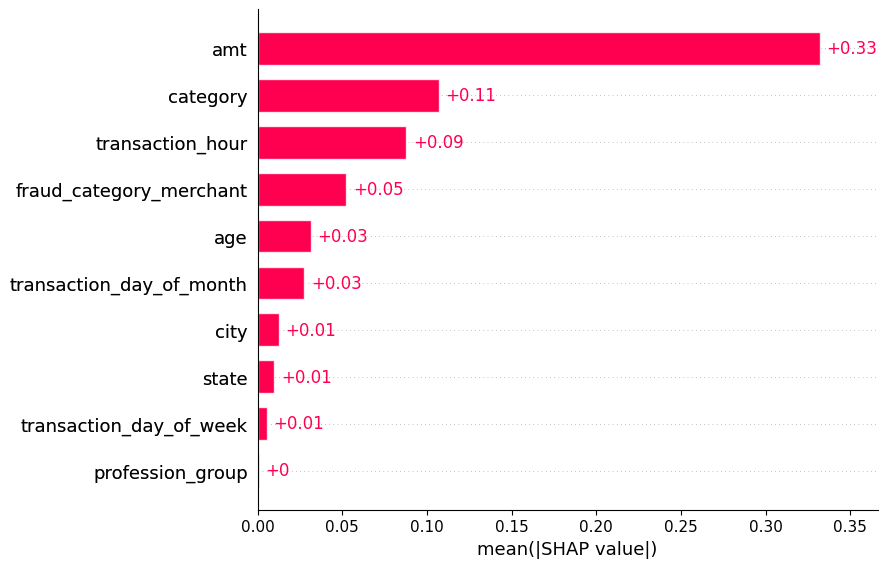

In [ ]:
K = 4  # Número de muestras que deseas usar para el fondo
X_background = shap.sample(X_train_filtro, K)

# Crear el objeto explainer utilizando el conjunto de fondo reducido
explainer = shap.KernelExplainer(modelo_best_randomDT.predict_proba, X_background)
shap_values = explainer(X_train_filtro)
shap.plots.bar(shap_values[:,:,0], max_display=X_train_filtro.shape[1])

### Evaluación

In [ ]:
# Calcula métricas
accuracy = accuracy_score(y_test, y_pred_testDT)
precision = precision_score(y_test, y_pred_testDT)
recall = recall_score(y_test, y_pred_testDT)
f1 = f1_score(y_test, y_pred_testDT)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_testDT).ravel()
specificity = tn / (tn + fp)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Specificity: {specificity}")

Accuracy: 0.9777546054918318
Precision: 0.8705583756345178
Recall: 0.9634831460674157
F1-score: 0.9146666666666666
Specificity: 0.9797699325664418


In [ ]:
# Tasa de falsos negativos
tasa_falsos_negativos = fn / (fn + tp)

# Tasa de falsos positivos
tasa_falsos_positivos = fp / (fp + tn)

print(f"Tasa de falsos negativos: {tasa_falsos_negativos}")
print(f"Tasa de falsos positivos: {tasa_falsos_positivos}")

Tasa de falsos negativos: 0.03651685393258427
Tasa de falsos positivos: 0.02023006743355811



Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2521
           1       0.87      0.96      0.91       356

    accuracy                           0.98      2877
   macro avg       0.93      0.97      0.95      2877
weighted avg       0.98      0.98      0.98      2877



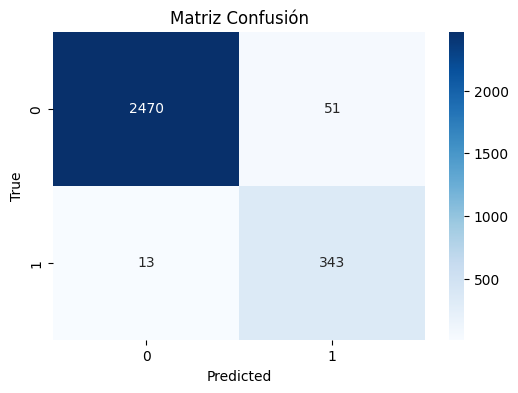

In [ ]:
# Reporte matriz de clasificación
print("\nClassification Report:")
print(classification_report(y_test, y_pred_testDT))

# Matriz Confusion
cm = confusion_matrix(y_test, y_pred_testDT)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz Confusión")
plt.show()

AUC: 0.9716265393169287


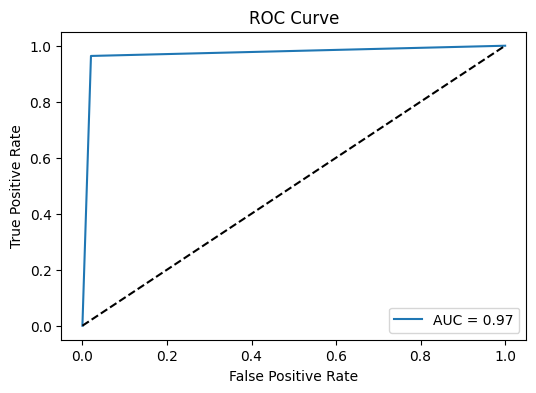

In [ ]:
# AUC y Curva ROC
auc = roc_auc_score(y_test, y_pred_testDT)
print(f"AUC: {auc}")
fpr, tpr, thresholds = roc_curve(y_test, y_pred_testDT)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

### Reducción de dimsensionalidad

In [ ]:
# Reduce el conjunto de datos a 2D usando t-SNE
# Estos sets de datos se utilizaran mas adelante para realizar la grafica de frontera de desicion
tsne = TSNE(n_components=2, random_state=56)
X_train_tsne = tsne.fit_transform(X_train_filtro)
X_test_tsne = tsne.fit_transform(X_test_filtro)

### Visualización de clases y Frontera de decisión

In [ ]:
# Predicciones en los datos de prueba utilizando el modelo ya entrenado
y_pred_tsneDT = modelo_best_randomDT.predict(X_test_filtro)

# Crear un DataFrame para facilitar la visualización
trainDT = pd.DataFrame(X_train_tsne, columns=['Component 1', 'Component 2'])
trainDT['is_fraud'] = y_train  # Agregar la columna is_fraud al DataFrame de entrenamiento

testDT = pd.DataFrame(X_test_tsne, columns=['Component 1', 'Component 2'])
testDT['Predicted'] = y_pred_tsneDT  # Agregar las predicciones al DataFrame de prueba

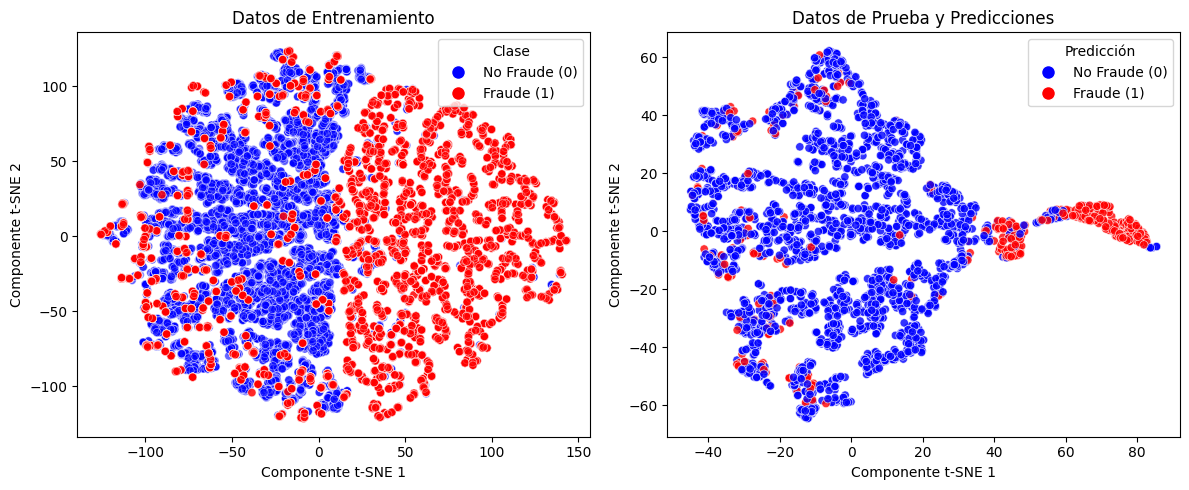

In [ ]:
frontera_decision(trainDT,testDT)

## Random Forest

### Entrenamiento

In [ ]:
modelo_RF = RandomForestClassifier(random_state=56)

In [ ]:
#Espacio de hipeparametros
paramsRF = {
    'n_estimators': [50, 75, 100, 125, 150, 200],# Número de árboles
    'max_features': ['sqrt', 'log2', None],# Número de características a considerar en cada división
    'max_depth':  randint(1, 20),# Profundidad máxima del árbol
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'criterion': ['gini', 'entropy']
}

In [ ]:
# Configuracion de RandomizedSearchCV
random_search_RF = RandomizedSearchCV(
    estimator=modelo_RF,
    param_distributions=paramsRF,
    n_iter=100,  # Número de combinaciones a probar
    scoring='roc_auc',  # Métrica de evaluación
    cv=5,  # Número de validaciones cruzadas
    verbose=1,  # Imprime el progreso
    random_state=144,
    n_jobs=-1  # Usa todos los núcleos disponibles
)

# Ejecuta la búsqueda en el conjunto de entrenamiento
random_search_RF.fit(X_train_filtro, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=56),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7818907fb0a0>,
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7818907fb1c0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x781890f4c580>,
                                        'n_estimators': [50, 75, 100, 125, 150,
                                                         200]},
                   random_state=144, scoring='roc_auc', verbose=1)

In [ ]:
# Imprime los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", random_search_RF.best_params_)

# Mejor score obtenido
print("\nMejor score obtenido:")
print(random_search_RF.best_score_)

Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 200}

Mejor score obtenido:
0.9996909151392039


In [ ]:
# Seleccionando los mejores estimadores
modelo_best_randomRF = random_search_RF.best_estimator_

# Se realiza el entreanamiento (fit)
modelo_best_randomRF.fit(X = X_train_filtro, y = y_train)

# Se realiza la predicción (predict)
y_pred_testRF = modelo_best_randomRF.predict(X = X_test_filtro)
y_pred_testRF

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Creando un DataFrame para mostrar y_test junto con las predicciones y_pred
df_resultadosRF_test = pd.DataFrame({'y_test': y_test, 'y_pred_test': y_pred_testRF})

# Imprimir el DataFrame con los resultados
print(df_resultadosRF_test)

      y_test  y_pred_test
0          0            0
1          0            0
2          0            0
3          0            0
4          0            0
...      ...          ...
2872       0            0
2873       0            0
2874       0            0
2875       0            0
2876       0            0

[2877 rows x 2 columns]


<Figure size 1600x1200 with 0 Axes>

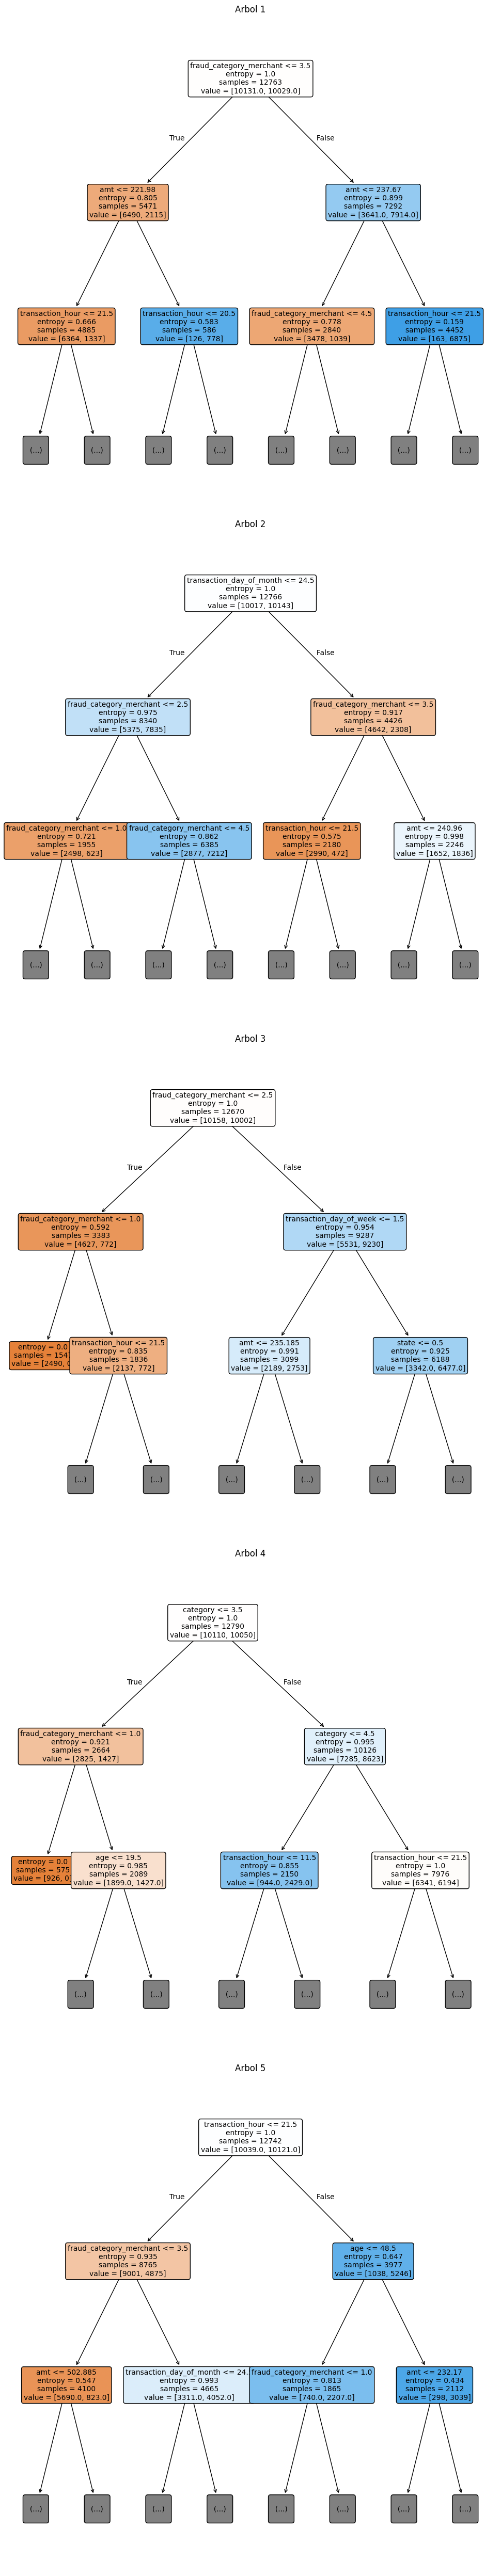

In [ ]:
# Configurar el tamaño de la figura (ancho, alto)
plt.figure(figsize=(16, 12))  # Aumenta el ancho y alto de la figura

# Número de árboles a visualizar
n_trees_to_plot = 5

# Figura para los gráficos
fig, axes = plt.subplots(n_trees_to_plot, 1, figsize=(10, 10 * n_trees_to_plot))

# Iterar los n_trees_to_plot árboles y mostrarlos
for i in range(n_trees_to_plot):
    # Obtener el árbol correspondiente del modelo
    tree = modelo_best_randomRF.estimators_[i]

    # Graficar el árbol con una profundidad máxima de 3
    plot_tree(tree,
              feature_names=X_train_filtro.columns,
              filled=True,
              ax=axes[i],
              rounded=True,
              fontsize=10,
              max_depth=2)
    axes[i].set_title(f'Arbol {i + 1}')

# Ajustar el espacio entre subgráficas
plt.tight_layout()
plt.show()

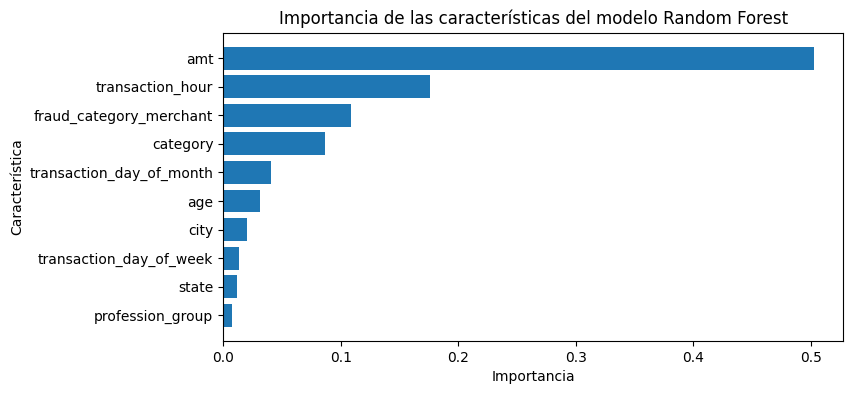

In [ ]:
# Obtener la importancia de las características
feature_importancesRF = modelo_best_randomRF.feature_importances_

# Obtener los nombres de las características
feature_names = X_train_filtro.columns

# Crear un DataFrame para facilitar la visualización
importanceRF = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importancesRF})

# Ordenar por importancia
importanceRF = importanceRF.sort_values(by='Importance', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(8, 4))
plt.barh(importanceRF['Feature'], importanceRF['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las características del modelo Random Forest')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la característica más importante en la parte superior
plt.show()

In [ ]:
import pickle

# descarga el modelo en formato .pkl
with open('modelo_rf.pkl', 'wb') as archivo_pkl:
    pickle.dump(modelo_best_randomRF, archivo_pkl)

### Explicabilidad

  0%|          | 0/20160 [00:00<?, ?it/s]

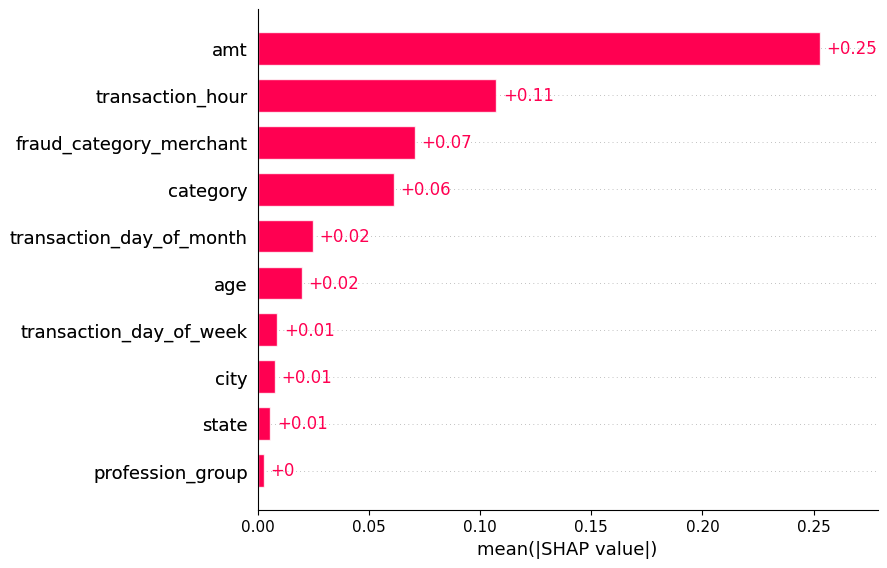

In [ ]:
K = 4  # Número de muestras que deseas usar para el shap
X_background = shap.sample(X_train_filtro, K)

# Crear el objeto explainer utilizando el conjunto de fondo reducido
explainer = shap.KernelExplainer(modelo_best_randomRF.predict_proba, X_background)
shap_values = explainer(X_train_filtro)
shap.plots.bar(shap_values[:,:,0], max_display=X_train_filtro.shape[1])

### Evaluación

In [ ]:
# Calcula métricas
accuracy = accuracy_score(y_test, y_pred_testRF)
precision = precision_score(y_test, y_pred_testRF)
recall = recall_score(y_test, y_pred_testRF)
f1 = f1_score(y_test, y_pred_testRF)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_testRF).ravel()
specificity = tn / (tn + fp)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Specificity: {specificity}")

Accuracy: 0.9878345498783455
Precision: 0.9572649572649573
Recall: 0.9438202247191011
F1-score: 0.9504950495049505
Specificity: 0.9940499801666005


In [ ]:
# Tasa de falsos negativos
tasa_falsos_negativos = fn / (fn + tp)

# Tasa de falsos positivos
tasa_falsos_positivos = fp / (fp + tn)

print(f"Tasa de falsos negativos: {tasa_falsos_negativos}")
print(f"Tasa de falsos positivos: {tasa_falsos_positivos}")

Tasa de falsos negativos: 0.056179775280898875
Tasa de falsos positivos: 0.005950019833399445



Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2521
           1       0.96      0.94      0.95       356

    accuracy                           0.99      2877
   macro avg       0.97      0.97      0.97      2877
weighted avg       0.99      0.99      0.99      2877



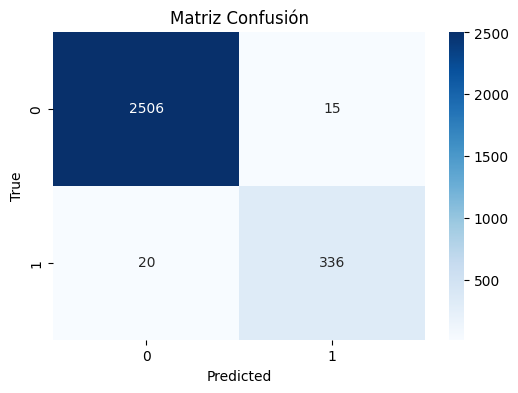

In [ ]:
# Reporte matriz de clasificación
print("\nClassification Report:")
print(classification_report(y_test, y_pred_testRF))

# Matriz Confusion
cm = confusion_matrix(y_test, y_pred_testRF)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz Confusión")
plt.show()

AUC: 0.9689351024428507


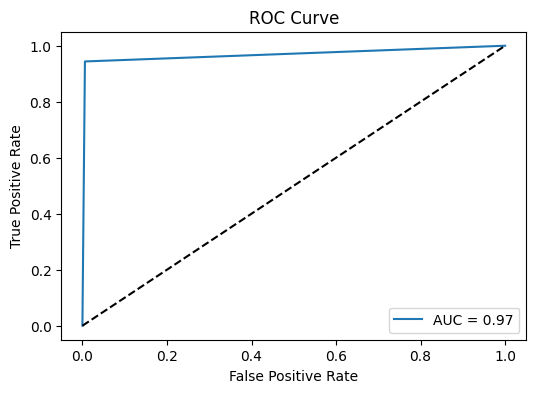

In [ ]:
# AUC y Curva ROC
auc = roc_auc_score(y_test, y_pred_testRF)
print(f"AUC: {auc}")
fpr, tpr, thresholds = roc_curve(y_test, y_pred_testRF)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

### Reducción de dimsensionalidad

In [ ]:
# Reduce el conjunto de datos a 2D usando t-SNE
# Estos sets de datos se utilizaran mas adelante para realizar la grafica de frontera de desicion
tsne = TSNE(n_components=2, random_state=56)
X_train_tsne = tsne.fit_transform(X_train_filtro)
X_test_tsne = tsne.fit_transform(X_test_filtro)

### Visualización de clases y Frontera de decisión

In [ ]:
# Predicciones en los datos de prueba utilizando el modelo ya entrenado
y_pred_tsneRF = modelo_best_randomRF.predict(X_test_filtro)

# Crear un DataFrame para facilitar la visualización
trainRF = pd.DataFrame(X_train_tsne, columns=['Component 1', 'Component 2'])
trainRF['is_fraud'] = y_train  # Agregar la columna is_fraud al DataFrame de entrenamiento

testRF = pd.DataFrame(X_test_tsne, columns=['Component 1', 'Component 2'])
testRF['Predicted'] = y_pred_tsneDT  # Agregar las predicciones al DataFrame de prueba

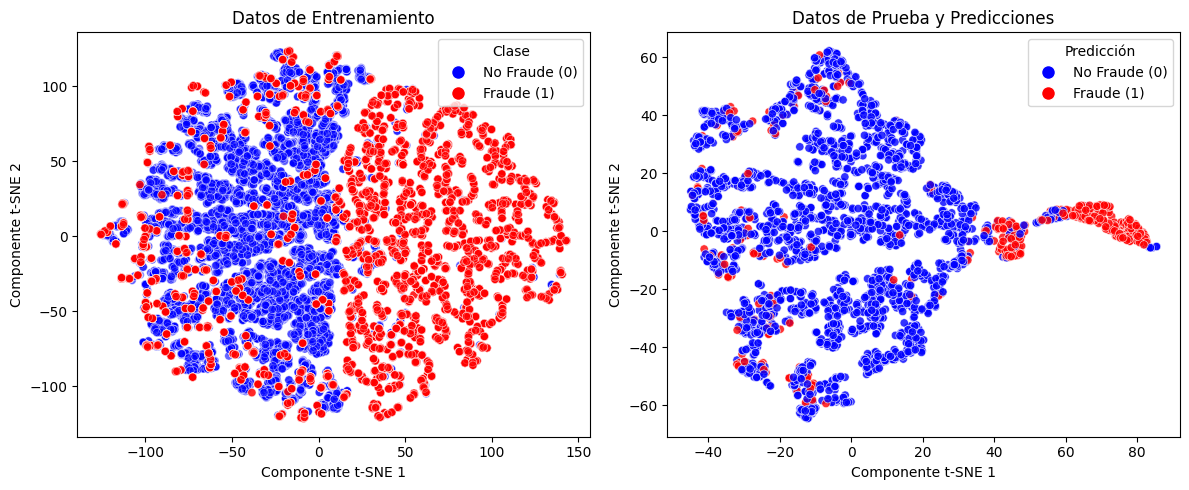

In [ ]:
frontera_decision(trainRF,testRF)

## Gradient Boosting

### Entrenamiento

Recuerden utilizar RandosearchCV y Validación cruzada para la búsqueda de los mejores hiperparámetros

In [ ]:
# X_train_filtro, y_train, X_test_filtro, y_test ===> VARIABLES DEFINITIVAS A USAR

In [ ]:
# Instanciamos el modelo, Se carga el clasificador
clasificador = GradientBoostingClassifier(random_state=56)
clasificador

GradientBoostingClassifier(random_state=56)

In [ ]:
# parámetros en el dicionario param_distGB para luego usar en RandomSearchCV

param_distGB = {
    "n_estimators": [50, 100, 200, 300],  # Número de árboles en el ensamble
    "learning_rate": [0.01, 0.1, 0.2],  # Tasa de aprendizaje
    "max_depth": [3, 4, 5],  # Profundidad máxima de cada árbol
    "min_samples_split": [2, 5, 10],  # Número mínimo de muestras para dividir un nodo
    "min_samples_leaf": [1, 2, 4],  # Número mínimo de muestras en una hoja
    "subsample": [0.8, 0.9, 1.0],  # Fracción de muestras utilizadas para entrenar cada árbol
    "loss": ["log_loss", "exponential"]  # Función de pérdida
}


In [ ]:
# RandomizedSearchCV
random_search_GB = RandomizedSearchCV(estimator=clasificador, param_distributions=param_distGB,
                                      n_iter=50, cv=5, n_jobs=-1, verbose=4, random_state=56)

# Se realiza el entrenamiento
random_search_GB.fit(X_train_filtro, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=56),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'loss': ['log_loss', 'exponential'],
                                        'max_depth': [3, 4, 5],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=56, verbose=4)

In [ ]:
# Mejores hiperparámetros encontrados
print("\nMejores hiperparámetros encontrados:")
print(random_search_GB.best_params_)

# Mejor score obtenido
print("\nMejor score obtenido:")
print(random_search_GB.best_score_)


Mejores hiperparámetros encontrados:
{'subsample': 0.8, 'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 4, 'loss': 'log_loss', 'learning_rate': 0.2}

Mejor score obtenido:
0.9955853174603174


In [ ]:
# Seleccionando los mejores estimadores
modelo_best_randomGB = random_search_GB.best_estimator_

# Se realiza el entreanamiento (fit)
modelo_best_randomGB.fit(X = X_train_filtro, y = y_train)

# Se realiza la predicción (predict)
y_pred_testGB = modelo_best_randomGB.predict(X = X_test_filtro)
y_pred_testGB

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Creando un DataFrame para mostrar y_test junto con las predicciones y_pred
df_resultadosGB_test = pd.DataFrame({'y_test': y_test, 'y_pred_test': y_pred_testGB})

# Imprimir el DataFrame con los resultados
print(df_resultadosGB_test)

      y_test  y_pred_test
0          0            0
1          0            0
2          0            0
3          0            0
4          0            0
...      ...          ...
2872       0            0
2873       0            0
2874       0            0
2875       0            0
2876       0            0

[2877 rows x 2 columns]


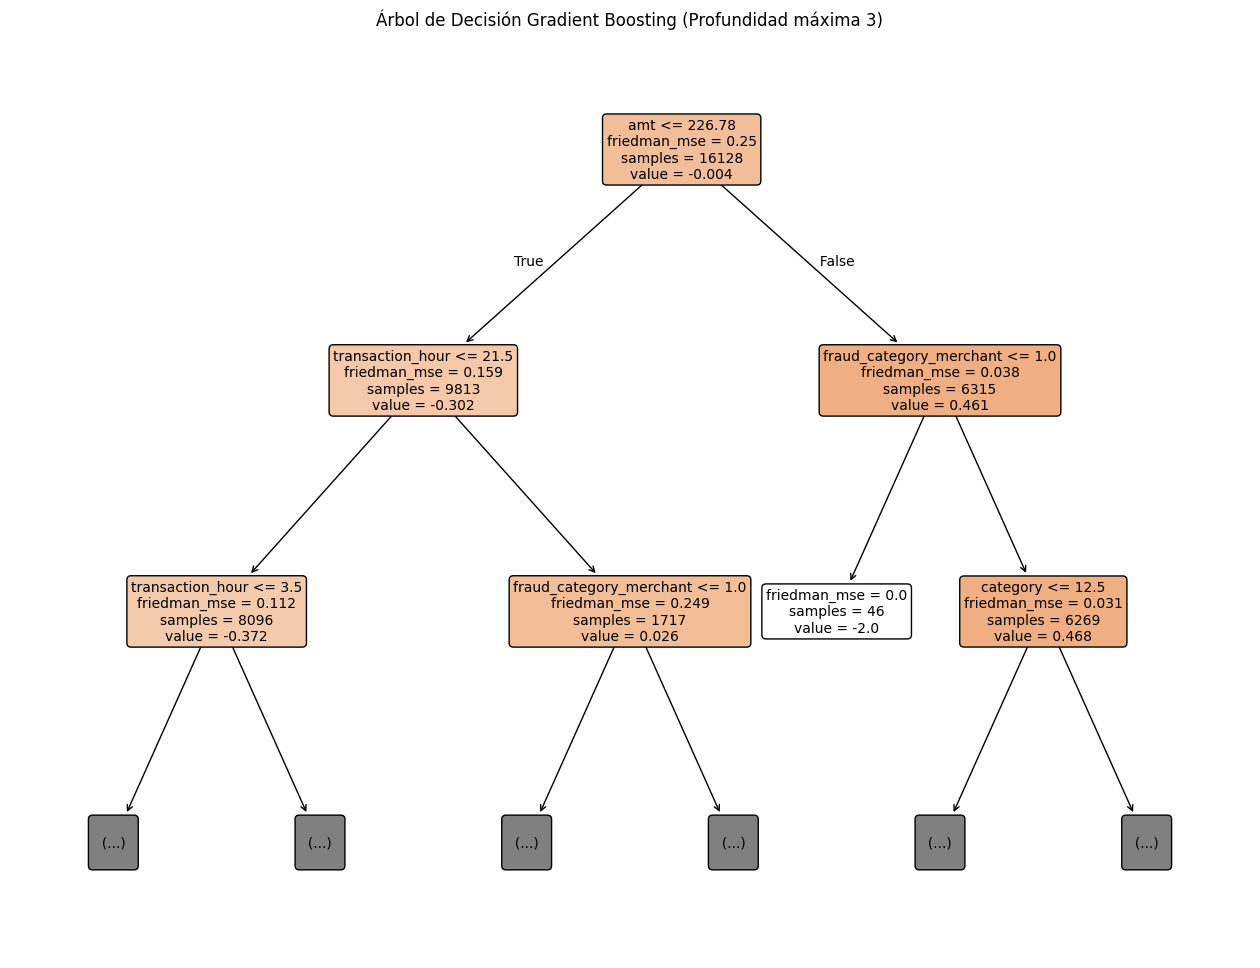

In [ ]:
# Import necessary libraries
from sklearn.tree import plot_tree
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt


# Assuming modelo_best_randomGB is your trained GradientBoostingClassifier
# Access individual trees within the ensemble
tree_to_plot = modelo_best_randomGB.estimators_[0, 0] # Access the first tree


# Configurar el tamaño de la figura (ancho, alto)
plt.figure(figsize=(16, 12))  # Aumenta el ancho y alto de la figura

plot_tree(
    tree_to_plot, # Pass the individual tree to plot_tree
    feature_names=X_train_filtro.columns,  # Nombres de las características
    class_names=['No Fraude', 'Fraude'],  # Etiquetas de las clases
    rounded=True,  # Bordes redondeados
    filled=True,  #relleno
    fontsize=10,   # Tamaño de la fuente
    max_depth=2    # Profundidad del árbol
)
plt.title("Árbol de Decisión Gradient Boosting (Profundidad máxima 3)")  # Título del gráfico
plt.show()

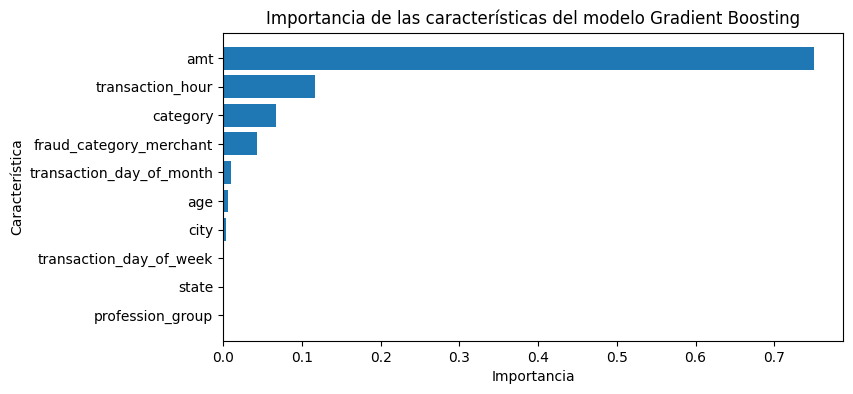

In [ ]:
# Obtener la importancia de las características
feature_importances = modelo_best_randomGB.feature_importances_

# Obtener los nombres de las características
feature_names = X_train_filtro.columns

# Crear un DataFrame para facilitar la visualización
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Ordenar por importancia
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(8, 4))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las características del modelo Gradient Boosting')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la característica más importante en la parte superior
plt.show()

In [ ]:
import pickle

# descarga el modelo en formato .pkl
with open('modelo_gb.pkl', 'wb') as archivo_pkl:
    pickle.dump(modelo_best_randomGB, archivo_pkl)

### Explicabilidad

In [ ]:
# X_train_filtro, X_test_filtro, y_train, y_test

  0%|          | 0/20160 [00:00<?, ?it/s]

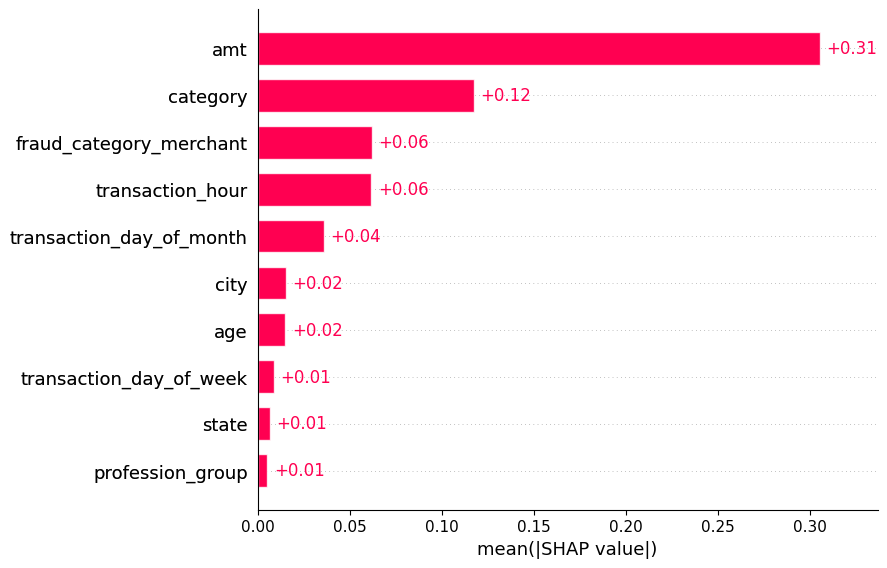

In [ ]:
K = 4  # Número de muestras que deseas usar para el shap
X_background = shap.sample(X_train_filtro, K)

# Crear el objeto explainer utilizando el conjunto de fondo reducido
explainer = shap.KernelExplainer(modelo_best_randomGB.predict_proba, X_background)
shap_values = explainer(X_train_filtro)
shap.plots.bar(shap_values[:,:,0], max_display=X_train_filtro.shape[1])

### Evaluación

In [ ]:
# Calcula métricas
accuracy = accuracy_score(y_test, y_pred_testGB)
precision = precision_score(y_test, y_pred_testGB)
recall = recall_score(y_test, y_pred_testGB)
f1 = f1_score(y_test, y_pred_testGB)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_testGB).ravel()
specificity = tn / (tn + fp)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Specificity: {specificity}")

Accuracy: 0.9895724713242962
Precision: 0.9630681818181818
Recall: 0.952247191011236
F1-score: 0.9576271186440678
Specificity: 0.9948433161443871


In [ ]:
# Tasa de falsos negativos
tasa_falsos_negativos = fn / (fn + tp)

# Tasa de falsos positivos
tasa_falsos_positivos = fp / (fp + tn)

print(f"Tasa de falsos negativos: {tasa_falsos_negativos}")
print(f"Tasa de falsos positivos: {tasa_falsos_positivos}")

Tasa de falsos negativos: 0.047752808988764044
Tasa de falsos positivos: 0.005156683855612852



Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2521
           1       0.96      0.95      0.96       356

    accuracy                           0.99      2877
   macro avg       0.98      0.97      0.98      2877
weighted avg       0.99      0.99      0.99      2877



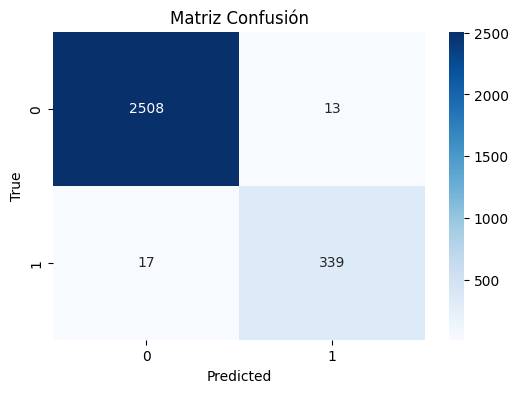

In [ ]:
# Reporte matriz de clasificación
print("\nClassification Report:")
print(classification_report(y_test, y_pred_testGB))

# Matriz Confusion
cm = confusion_matrix(y_test, y_pred_testGB)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz Confusión")
plt.show()

AUC: 0.9735452535778116


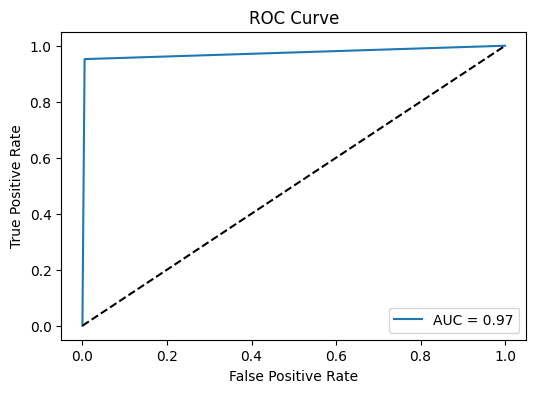

In [ ]:
# AUC y Curva ROC
auc = roc_auc_score(y_test, y_pred_testGB)
print(f"AUC: {auc}")
fpr, tpr, thresholds = roc_curve(y_test, y_pred_testGB)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

### Reducción de dimensionalidad

In [ ]:
# Reduce el conjunto de datos a 2D usando t-SNE
# Estos sets de datos se utilizaran mas adelante para realizar la grafica de frontera de desicion
tsne = TSNE(n_components=2, random_state=56)
X_train_tsne = tsne.fit_transform(X_train_filtro)
X_test_tsne = tsne.fit_transform(X_test_filtro)

### Visualización de clases y Frontera de decisión

In [ ]:
# Predicciones en los datos de prueba utilizando el modelo ya entrenado
y_pred_tsneGB = modelo_best_randomGB.predict(X_test_filtro)

# Crear un DataFrame para facilitar la visualización
trainGB = pd.DataFrame(X_train_tsne, columns=['Component 1', 'Component 2'])
trainGB['is_fraud'] = y_train  # Agregar la columna is_fraud al DataFrame de entrenamiento

testGB = pd.DataFrame(X_test_tsne, columns=['Component 1', 'Component 2'])
testGB['Predicted'] = y_pred_tsneDT  # Agregar las predicciones al DataFrame de prueba

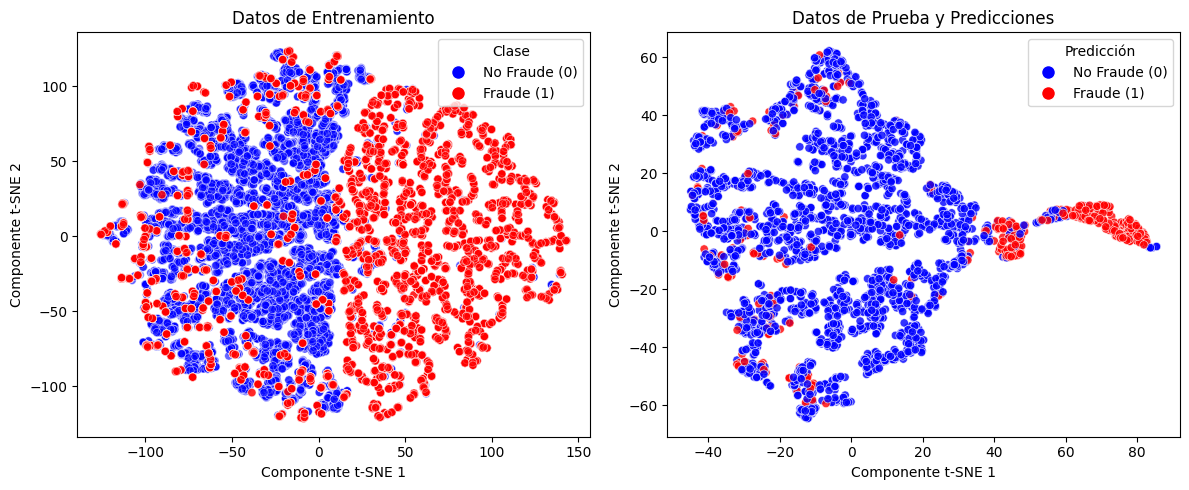

In [ ]:
frontera_decision(trainGB,testGB)

## MLP

### Entrenamiento

In [ ]:
# Fijar la semilla de TensorFlow
tf.random.set_seed(56)

In [ ]:
# Define el modelo
modelo = Sequential()
# Añadir una capa de entrada
modelo.add(Input(shape=(10,)))

modelo.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
modelo.add(Dropout(0.05))  # Regularización con Dropout
modelo.add(Dense(32, activation='relu'))
modelo.add(Dropout(0.05))  # Regularización con Dropout
modelo.add(Dense(16, activation='relu'))
modelo.add(Dense(8, activation='relu'))

modelo.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compilación del modelo con tasa de aprendizaje inicial
optimizerAdam = tf.keras.optimizers.Adam(learning_rate=0.001)
modelo.compile(loss='binary_crossentropy',
              optimizer=optimizerAdam,
              metrics=['accuracy'])

# Muestra la arquitectura del modelo
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,457 (13.50 KB)

 Trainable params: 3,457 (13.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Función de tasa de aprendizaje variable (decaimiento por pasos)
def lr_schedule(epoch):
    return 0.001 * (0.1 ** int(epoch / 10))

In [ ]:
# Early stopping para evitar sobreajuste
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Tasa de aprendizaje variable
lr_scheduler = LearningRateScheduler(lr_schedule)

# Entrenamiento del modelo
history = modelo.fit(X_train_sin_atipico_filtro_scaler, y_train_sin_atipico, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping, lr_scheduler], verbose=1)

Epoch 1/100
504/504 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8499 - loss: 0.4148 - val_accuracy: 0.8259 - val_loss: 0.3358 - learning_rate: 0.0010
Epoch 2/100
504/504 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9037 - loss: 0.2520 - val_accuracy: 0.8643 - val_loss: 0.2994 - learning_rate: 0.0010
Epoch 3/100
504/504 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9132 - loss: 0.2281 - val_accuracy: 0.8728 - val_loss: 0.2803 - learning_rate: 0.0010
Epoch 4/100
504/504 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9218 - loss: 0.2088 - val_accuracy: 0.8695 - val_loss: 0.2751 - learning_rate: 0.0010
Epoch 5/100
504/504 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9262 - loss: 0.1965 - val_accuracy: 0.8886 - val_loss: 0.2571 - learning_rate: 0.0010
Epoch 6/100
504/504 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9300 - loss: 0.1894 - val_accuracy: 0.8906 - val_loss: 0.2530 - learning_rate: 0.0010
Epoch 7/100
504/504 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9362 - loss: 0.

In [ ]:
def plot_loss_historia_keras(history):
    # Graficar el histórico de pérdida durante el entrenamiento
    plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
    plt.plot(history.history['val_loss'], label='Pérdida de Validación')
    plt.title('Pérdida durante el Entrenamiento')
    plt.xlabel('Época')
    plt.ylabel('Pérdida')
    plt.legend()
    plt.show()

def plot_acc_historia_keras(history):
    # Graficar la precisión durante el entrenamiento
    plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
    plt.title('Precisión durante el Entrenamiento')
    plt.xlabel('Época')
    plt.ylabel('Precisión')
    plt.legend()
    plt.show()

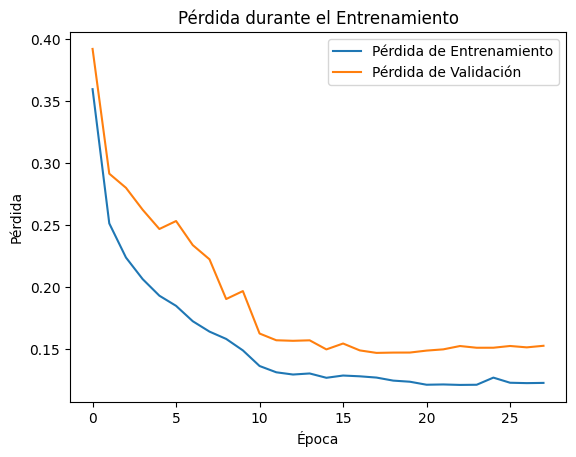

In [ ]:
plot_loss_historia_keras(history)

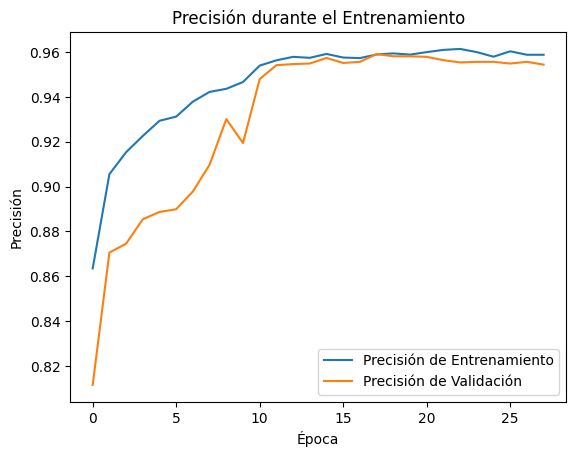

In [ ]:
plot_acc_historia_keras(history)

In [ ]:
# Evaluando el modelo en TRAIN
loss, accuracy = modelo.evaluate(X_train_sin_atipico_filtro_scaler, y_train_sin_atipico)
print('Loss:', loss)
print('Accuracy:', accuracy)

630/630 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9739 - loss: 0.0987
Loss: 0.1129295825958252
Accuracy: 0.9694444537162781


In [ ]:
# Evaluando el modelo de predicción de TEST
print("[INFO]: Evaluando red neuronal...")
modelo.predict(X_test_filtro_scaler)
loss, accuracy = modelo.evaluate(X_test_filtro_scaler, y_test)
#print('Loss {}, accuracy {}'.format(loss,accuracy))
print('Loss:', loss)
print('Accuracy:', accuracy)

[INFO]: Evaluando red neuronal...
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9622 - loss: 0.1213
Loss: 0.12852054834365845
Accuracy: 0.9586374759674072


In [ ]:
# Realiza predicciones en el conjunto de prueba
y_pred_testMLP = (modelo.predict(X_test_filtro_scaler) > 0.5).astype("int32")

90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
# Crea un DataFrame con y_test e y_pred
comparison_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred_testMLP.flatten()})

# Muestra el DataFrame
print(comparison_df)

      y_test  y_pred
0          0       0
1          0       0
2          0       0
3          0       0
4          0       0
...      ...     ...
2872       0       0
2873       0       0
2874       0       0
2875       0       0
2876       0       0

[2877 rows x 2 columns]


In [ ]:
import pickle

# descarga el modelo en formato .pkl
with open('modelo_mlp.pkl', 'wb') as archivo_pkl:
    pickle.dump(modelo, archivo_pkl)

In [ ]:
# descarga el encoder en formato .pkl
with open('encoder_LabelEncoder.pkl', 'wb') as archivo_pkl:
    pickle.dump(encoder, archivo_pkl)

In [ ]:
# descarga el escalador en formato .pkl
with open('escalador_StandarScaler.pkl', 'wb') as archivo_pkl:
    pickle.dump(escalador, archivo_pkl)

### Explicabilidad

In [ ]:
# X_train_sin_atipico_filtro_scaler, X_test_filtro_scaler, y_train_sin_atipico, y_test

In [ ]:
#Computemos los valores SHAP de nuestro modelo
import shap
# Obtener los nombres de las características
feature_names = X_train_sin_atipico_filtro_scaler.columns
explainer = shap.Explainer(modelo, X_train_sin_atipico_filtro_scaler,feature_names=feature_names)
shap_values = explainer(X_train_sin_atipico_filtro_scaler)

ExactExplainer explainer: 20161it [32:38, 10.29it/s]


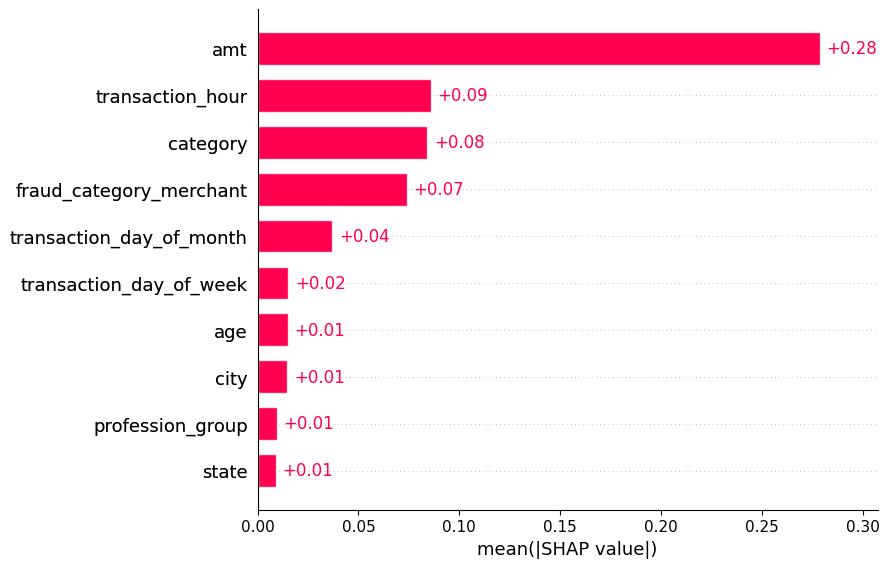

In [ ]:
# Para nuestro modelo, la caracteristica que mas aporta para que se prediga de la clase Positiva
shap.plots.bar(shap_values[:,:], max_display=X_train_sin_atipico_filtro_scaler.shape[1])

clase 1


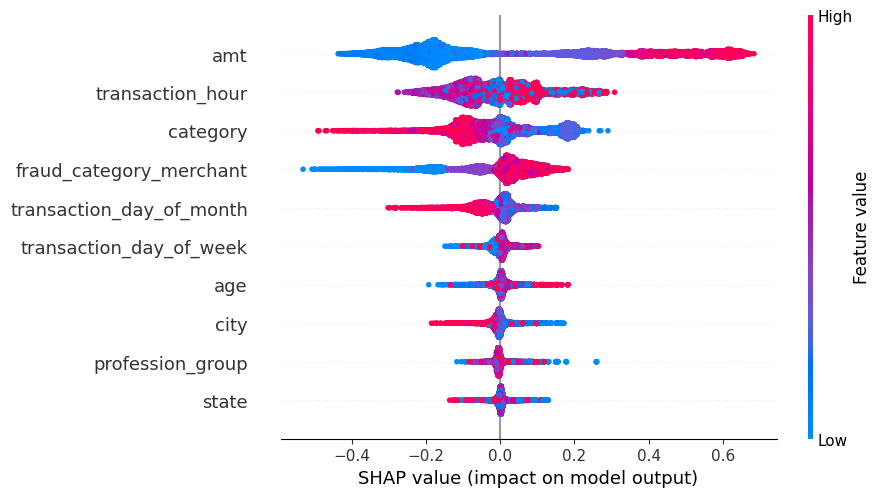

In [ ]:
# Podriamos ver para cada clase como aporta cada caracteristica a la predicción del modelo
print("clase 1")
shap.plots.beeswarm(shap_values[:,:], max_display=X_train_sin_atipico_filtro_scaler.shape[1])

### Evaluación

In [ ]:
# Calcula métricas
accuracy = accuracy_score(y_test, y_pred_testMLP)
precision = precision_score(y_test, y_pred_testMLP)
recall = recall_score(y_test, y_pred_testMLP)
f1 = f1_score(y_test, y_pred_testMLP)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_testMLP).ravel()
specificity = tn / (tn + fp)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Specificity: {specificity}")

Accuracy: 0.9586374695863747
Precision: 0.8015267175572519
Recall: 0.8848314606741573
F1-score: 0.8411214953271028
Specificity: 0.9690598968663229


In [ ]:
# Tasa de falsos negativos
tasa_falsos_negativos = fn / (fn + tp)

# Tasa de falsos positivos
tasa_falsos_positivos = fp / (fp + tn)

print(f"Tasa de falsos negativos: {tasa_falsos_negativos}")
print(f"Tasa de falsos positivos: {tasa_falsos_positivos}")

Tasa de falsos negativos: 0.1151685393258427
Tasa de falsos positivos: 0.03094010313367711



Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2521
           1       0.80      0.88      0.84       356

    accuracy                           0.96      2877
   macro avg       0.89      0.93      0.91      2877
weighted avg       0.96      0.96      0.96      2877



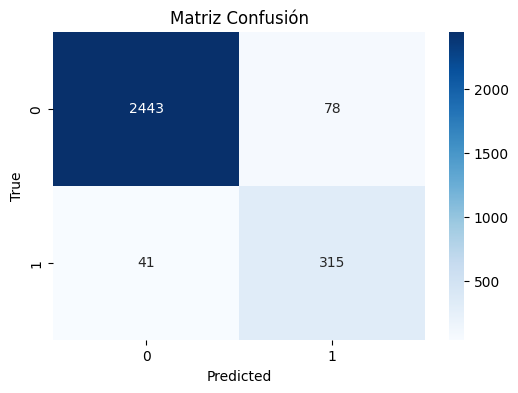

In [ ]:
# Reporte matriz de clasificación
print("\nClassification Report:")
print(classification_report(y_test, y_pred_testMLP))

# Matriz Confusion
cm = confusion_matrix(y_test, y_pred_testMLP)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz Confusión")
plt.show()

AUC: 0.92694567877024


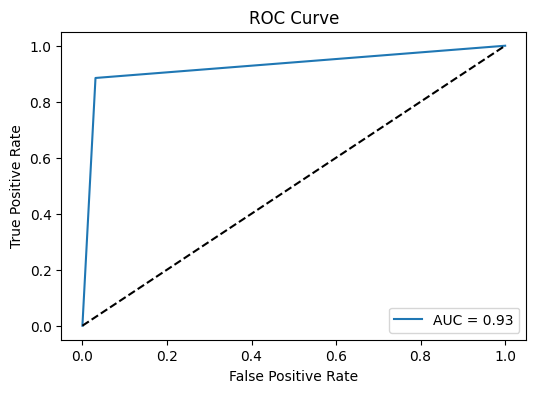

In [ ]:
# AUC y Curva ROC
auc = roc_auc_score(y_test, y_pred_testMLP)
print(f"AUC: {auc}")
fpr, tpr, thresholds = roc_curve(y_test, y_pred_testMLP)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

### Redución de dimensionalidad

In [ ]:
# Reduce el conjunto de datos a 2D usando t-SNE
# Estos sets de datos se utilizaran mas adelante para realizar la grafica de frontera de desicion
tsne = TSNE(n_components=2, random_state=56)
X_train_tsne = tsne.fit_transform(X_train_sin_atipico_filtro_scaler)
X_test_tsne = tsne.fit_transform(X_test_filtro_scaler)

### Visualización de clases y Frontera de decisión

In [ ]:
# Predicciones en los datos de prueba utilizando el modelo ya entrenado
y_pred_tsneMLP = modelo.predict(X_test_filtro_scaler)

# Crear un DataFrame para facilitar la visualización
trainMLP = pd.DataFrame(X_train_tsne, columns=['Component 1', 'Component 2'])
trainMLP['is_fraud'] = y_train_sin_atipico  # Agregar la columna is_fraud al DataFrame de entrenamiento

testMLP = pd.DataFrame(X_test_tsne, columns=['Component 1', 'Component 2'])
testMLP['Predicted'] = y_pred_tsneMLP  # Agregar las predicciones al DataFrame de prueba# Configuración de los gráficos

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


<ipython-input-52-1b16566d63bd>:19: UserWarning: 
The palette list has fewer values (2) than needed (2877) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='Component 1', y='Component 2', hue='Predicted',


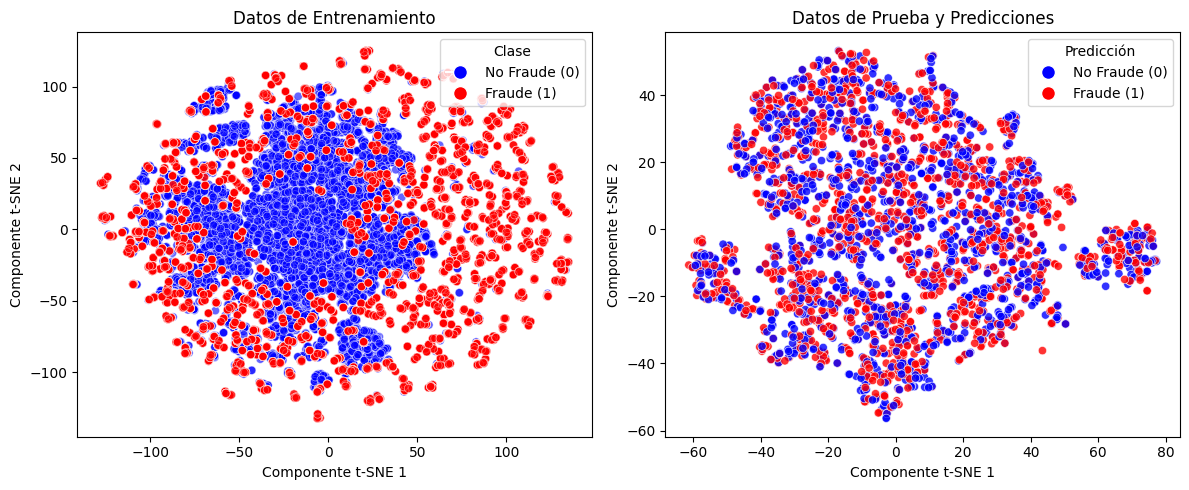

In [ ]:
frontera_decision(trainMLP,testMLP)